<a href="https://colab.research.google.com/github/yumi-h-1/Visualisation-of-Terrorist-Occurrences-Relative-to-the-Economic-Index/blob/main/Visual_Analysis_of_Terrorist_Occurrences_Relative_to_the_Economic_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
np.random.seed(0)

In [ ]:
# Mount the google drive to import the dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!python --version

Python 3.10.12


In [ ]:
dj_df = pd.read_csv('/content/drive/MyDrive/Datasets/Dow Jones Data/Dow Jones Industrial Average Historical Price Data.csv')
dj_df

Unnamed: 0        Date      Price       Open       High        Low  \
0              0  29/12/2023  37,689.54  37,701.63  37,758.67  37,540.35   
1              1  28/12/2023  37,710.63  37,661.52  37,778.70  37,661.52   
2              2  27/12/2023  37,656.52  37,518.62  37,683.42  37,488.68   
3              3  26/12/2023  37,545.33  37,405.90  37,616.38  37,371.83   
4              4  22/12/2023  37,385.97  37,349.27  37,534.09  37,269.14   
...          ...         ...        ...        ...        ...        ...   
6032        4995  07/01/2000  11,522.56  11,247.06  11,528.14  11,239.92   
6033        4996  06/01/2000  11,253.27  11,113.37  11,313.45  11,098.45   
6034        4997  05/01/2000  11,122.66  10,989.37  11,215.10  10,938.67   
6035        4998  04/01/2000  10,997.94  11,349.75  11,350.06  10,986.45   
6036        4999  03/01/2000  11,357.51  11,501.85  11,522.01  11,305.69   

         Vol. Change %  
0     228.30M   -0.06%  
1     196.93M    0.14%  
2     243.55M    0.30%  
3     210.44M    0.43%  
4     249.72M   -0.05%  
...       ...      ...  
6032  184.90M    2.39%  
6033  176.55M    1.17%  
6034  203.19M    1.13%  
6035  178.42M   -3.17%  
6036  169.75M   -1.21%  

[6037 rows x 8 columns]

In [ ]:
dj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6037 entries, 0 to 6036
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6037 non-null   int64 
 1   Date        6037 non-null   object
 2   Price       6037 non-null   object
 3   Open        6037 non-null   object
 4   High        6037 non-null   object
 5   Low         6037 non-null   object
 6   Vol.        6037 non-null   object
 7   Change %    6037 non-null   object
dtypes: int64(1), object(7)
memory usage: 377.4+ KB


In [ ]:
dj_df['Date'] = pd.to_datetime(dj_df.Date)

<ipython-input-6-bf3719ba3132>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dj_df['Date'] = pd.to_datetime(dj_df.Date)


In [ ]:
columns_to_float = ['Price', 'Open', 'High', 'Low']

for column in columns_to_float:
    dj_df[column] = dj_df[column].str.replace(',', '').astype(float)

In [ ]:
dj_df

Unnamed: 0       Date     Price      Open      High       Low     Vol.  \
0              0 2023-12-29  37689.54  37701.63  37758.67  37540.35  228.30M   
1              1 2023-12-28  37710.63  37661.52  37778.70  37661.52  196.93M   
2              2 2023-12-27  37656.52  37518.62  37683.42  37488.68  243.55M   
3              3 2023-12-26  37545.33  37405.90  37616.38  37371.83  210.44M   
4              4 2023-12-22  37385.97  37349.27  37534.09  37269.14  249.72M   
...          ...        ...       ...       ...       ...       ...      ...   
6032        4995 2000-07-01  11522.56  11247.06  11528.14  11239.92  184.90M   
6033        4996 2000-06-01  11253.27  11113.37  11313.45  11098.45  176.55M   
6034        4997 2000-05-01  11122.66  10989.37  11215.10  10938.67  203.19M   
6035        4998 2000-04-01  10997.94  11349.75  11350.06  10986.45  178.42M   
6036        4999 2000-03-01  11357.51  11501.85  11522.01  11305.69  169.75M   

     Change %  
0      -0.06%  
1       0.14%  
2       0.30%  
3       0.43%  
4      -0.05%  
...       ...  
6032    2.39%  
6033    1.17%  
6034    1.13%  
6035   -3.17%  
6036   -1.21%  

[6037 rows x 8 columns]

In [ ]:
dj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6037 entries, 0 to 6036
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  6037 non-null   int64         
 1   Date        6037 non-null   datetime64[ns]
 2   Price       6037 non-null   float64       
 3   Open        6037 non-null   float64       
 4   High        6037 non-null   float64       
 5   Low         6037 non-null   float64       
 6   Vol.        6037 non-null   object        
 7   Change %    6037 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 377.4+ KB


In [ ]:
dj_df = dj_df.sort_values(by='Date')

In [ ]:
dj_df

Unnamed: 0       Date     Price      Open      High       Low     Vol.  \
6016        4979 2000-01-02  11041.06  10937.74  11073.32  10907.96  183.04M   
5996        4959 2000-01-03  10137.93  10128.11  10186.33  10084.56  216.78M   
5954        4917 2000-01-05  10811.79  10749.42  10926.26  10724.22  174.02M   
5932        4895 2000-01-06  10652.20  10532.27  10673.45  10513.08  183.99M   
5890        4853 2000-01-08  10606.95  10523.81  10626.92  10516.76  151.42M   
...          ...        ...       ...       ...       ...       ...      ...   
4              4 2023-12-22  37385.97  37349.27  37534.09  37269.14  249.72M   
3              3 2023-12-26  37545.33  37405.90  37616.38  37371.83  210.44M   
2              2 2023-12-27  37656.52  37518.62  37683.42  37488.68  243.55M   
1              1 2023-12-28  37710.63  37661.52  37778.70  37661.52  196.93M   
0              0 2023-12-29  37689.54  37701.63  37758.67  37540.35  228.30M   

     Change %  
6016    0.92%  
5996    0.09%  
5954    0.73%  
5932    1.23%  
5890    0.81%  
...       ...  
4      -0.05%  
3       0.43%  
2       0.30%  
1       0.14%  
0      -0.06%  

[6037 rows x 8 columns]

In [ ]:
dj_df_years = dj_df.Date.dt.year.unique()

In [ ]:
dj_df_years = dj_df_years.tolist()

In [ ]:
import matplotlib.dates as mdates

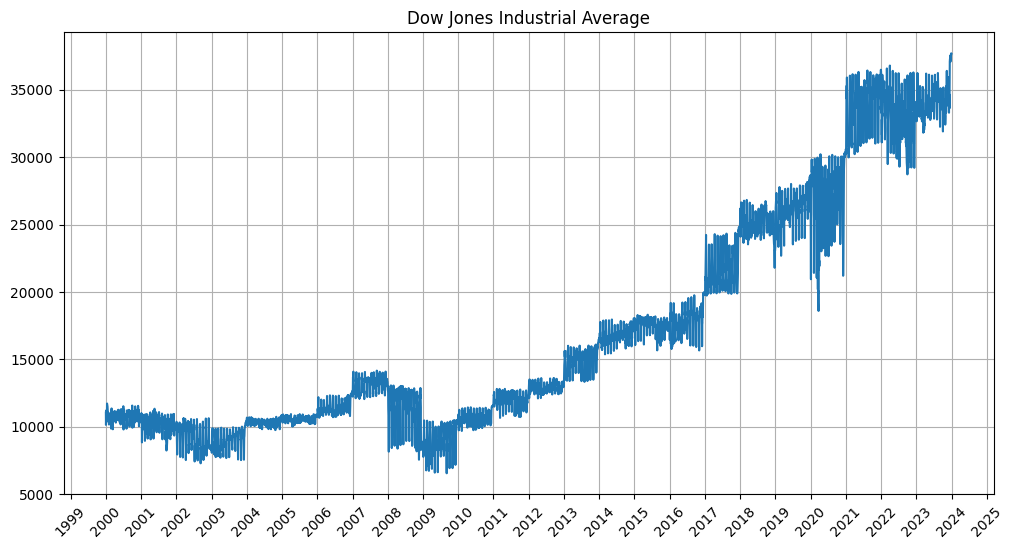

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dj_df['Date'], dj_df['Price'])

ax.xaxis_date()

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.xticks(rotation=45)

plt.title('Dow Jones Industrial Average')
ax.grid(True)
plt.show()

In [ ]:
from datetime import datetime as dt

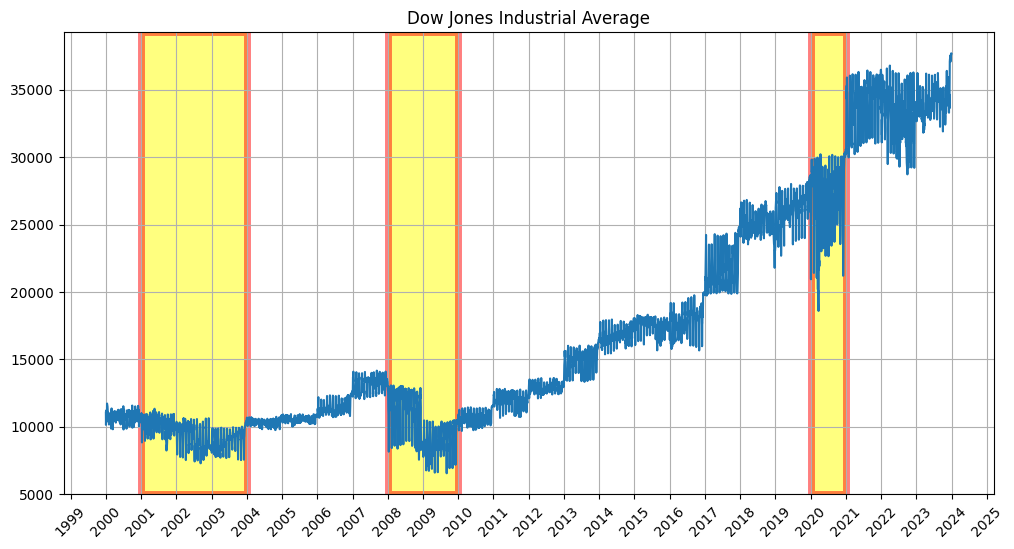

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(dj_df['Date'], dj_df['Price'])

ax.xaxis_date()

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.xticks(rotation=45)

rec_start1 = dt(2001, 1, 1)
rec_end1 = dt(2003, 12, 31)

plt.axvspan(rec_start1, rec_end1, facecolor='yellow', alpha=0.5, edgecolor='red', linewidth=5)

rec_start2 = dt(2008, 1, 1)
rec_end2 = dt(2009, 12, 31)

plt.axvspan(rec_start2, rec_end2, facecolor='yellow', alpha=0.5, edgecolor='red', linewidth=5)

rec_start3 = dt(2020, 1, 1)
rec_end3 = dt(2020, 12, 31)

plt.axvspan(rec_start3, rec_end3, facecolor='yellow', alpha=0.5, edgecolor='red', linewidth=5)


plt.title('Dow Jones Industrial Average')
ax.grid(True)
plt.show()



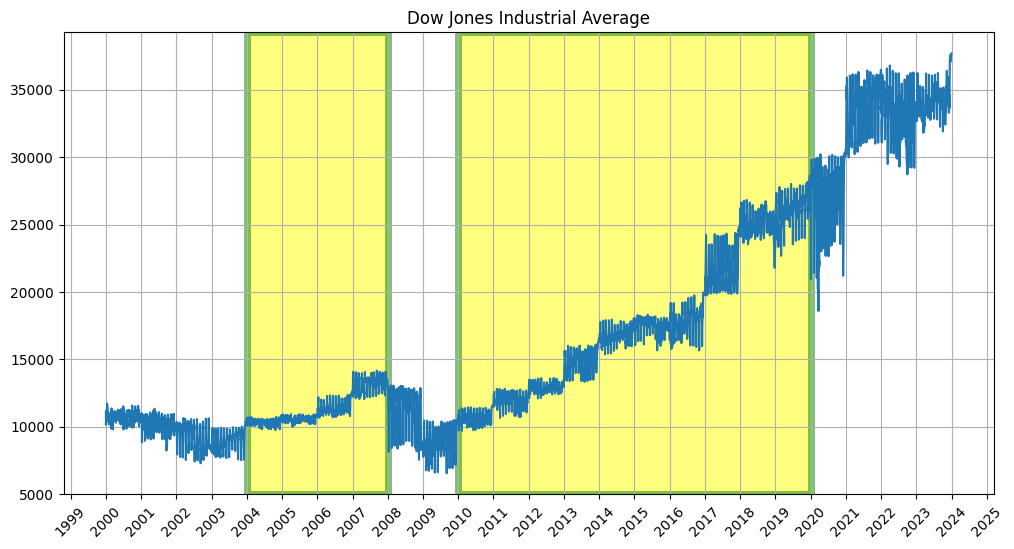

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(dj_df['Date'], dj_df['Price'])

ax.xaxis_date()

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.xticks(rotation=45)

boom_start1 = dt(2004, 1, 1)
boom_end1 = dt(2007, 12, 31)

plt.axvspan(boom_start1, boom_end1, facecolor='yellow', alpha=0.5, edgecolor='green', linewidth=5)

boom_start2 = dt(2010, 1, 1)
boom_end2 = dt(2019, 12, 31)

plt.axvspan(boom_start2, boom_end2, facecolor='yellow', alpha=0.5, edgecolor='green', linewidth=5)

plt.title('Dow Jones Industrial Average')
ax.grid(True)
plt.show()



In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Datasets/Global Terrorism Data/globalterrorismdb_2000_2021.xlsx')
df

eventid  iyear  imonth  iday  approxdate  extended resolution  \
0       200001010001   2000       1     1         NaN         0        NaT   
1       200001010002   2000       1     1         NaN         1        NaT   
2       200001010003   2000       1     1         NaN         0        NaT   
3       200001010004   2000       1     1         NaN         0        NaT   
4       200001010005   2000       1     1         NaN         0        NaT   
...              ...    ...     ...   ...         ...       ...        ...   
144827  202106300023   2021       6    30         NaN         0        NaT   
144828  202106300029   2021       6    30  06/30/2021         0        NaT   
144829  202106300030   2021       6    30         NaN         1 2021-07-08   
144830  202106300038   2021       6    30         NaN         0        NaT   
144831  202107020037   2021       6    30         NaN         0        NaT   

        country  country_txt  region  ...  \
0           139      Namibia      11  ...   
1           139      Namibia      11  ...   
2            92        India       6  ...   
3          1003       Kosovo       9  ...   
4           182      Somalia      11  ...   
...         ...          ...     ...  ...   
144827        4  Afghanistan       6  ...   
144828      138      Myanmar       5  ...   
144829      147      Nigeria      11  ...   
144830       45     Colombia       3  ...   
144831      138      Myanmar       5  ...   

                                                 addnotes  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
144827                                                NaN   
144828                                                NaN   
144829                                                NaN   
144830                                                NaN   
144831  There is doubt that this incident meets terror...   

                                                   scite1  \
0       “Namibia: UNITA Rebels Reportedly Abduct 20 Vi...   
1       “Namibia: UNITA Rebels Reportedly Abduct 20 Vi...   
2       “Lashkar 'Suicide' Squad Attacks Army Camp in ...   
3       “Kosovo: Romany Home Attacked, 1 Person Injure...   
4       “Somalia: 'Over 6' Killed in Mogadishu Attack,...   
...                                                   ...   
144827  "Gunmen blow up power pylon in Parwan," Afghan...   
144828  "Spring Revolution Daily News for 16-30 June 2...   
144829  "Boko Haram Releases Abducted Catholic Priest ...   
144830  "Two dead and one wounded after clashes betwee...   
144831  "Spring Revolution Daily News for 2-7 July 202...   

                                                   scite2  \
0       “Namibia: 4 Injured in Shootout; UNITA 'Bandit...   
1       “Namibia: 4 Injured in Shootout; UNITA 'Bandit...   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
144827  "Provinces hit by blackout after power pylon d...   
144828                                                NaN   
144829  "Kidnapped Maiduguri Catholic Priest regains f...   
144830                                                NaN   
144831                                                NaN   

                                                   scite3  \
0       “Abducted Namibians Reportedly Still Held by U...   
1       “Abducted Namibians Reportedly Still Held by U...   
2                                                     NaN   
3                                                     NaN   
4                              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144832 entries, 0 to 144831
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 149.2+ MB


In [ ]:
subset_df1 = df.iloc[:, 0:68]

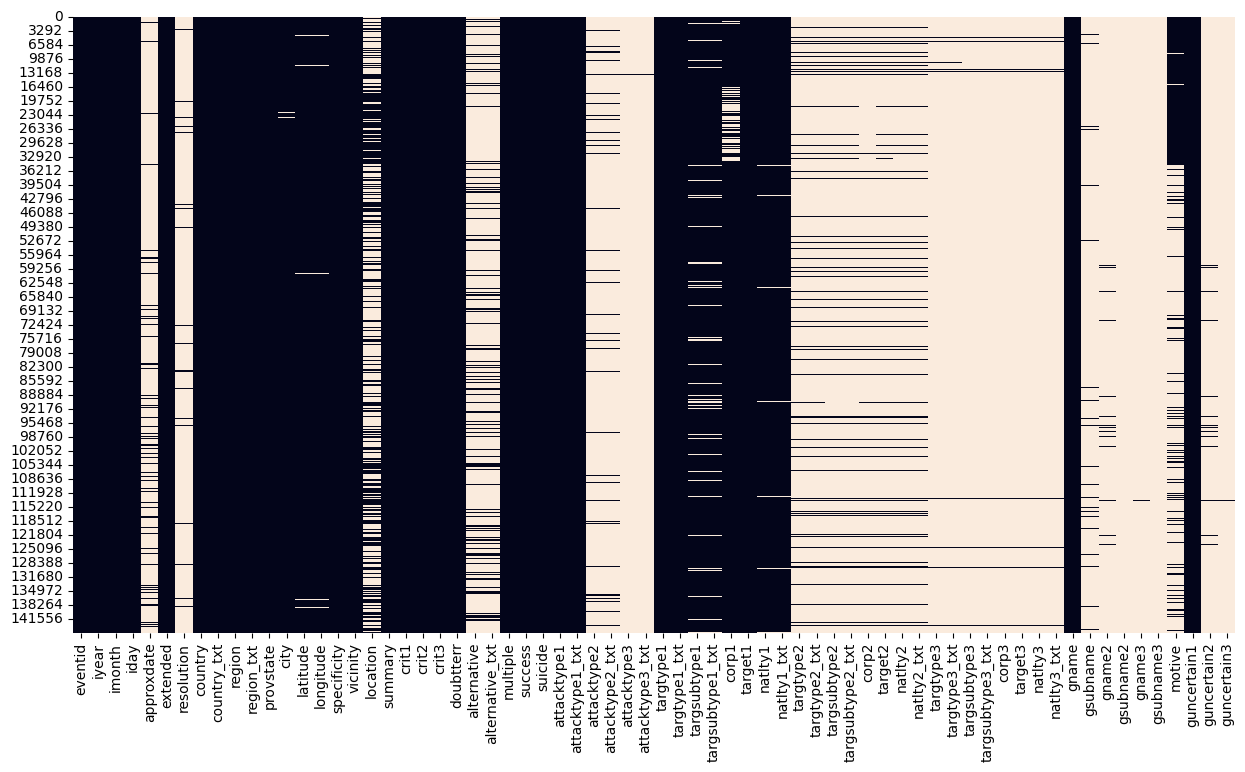

In [ ]:
plt.figure(figsize=(15, 8));
sns.heatmap(subset_df1.isnull(), cbar=False);

In [ ]:
subset_df2 = df.iloc[:, 68:]

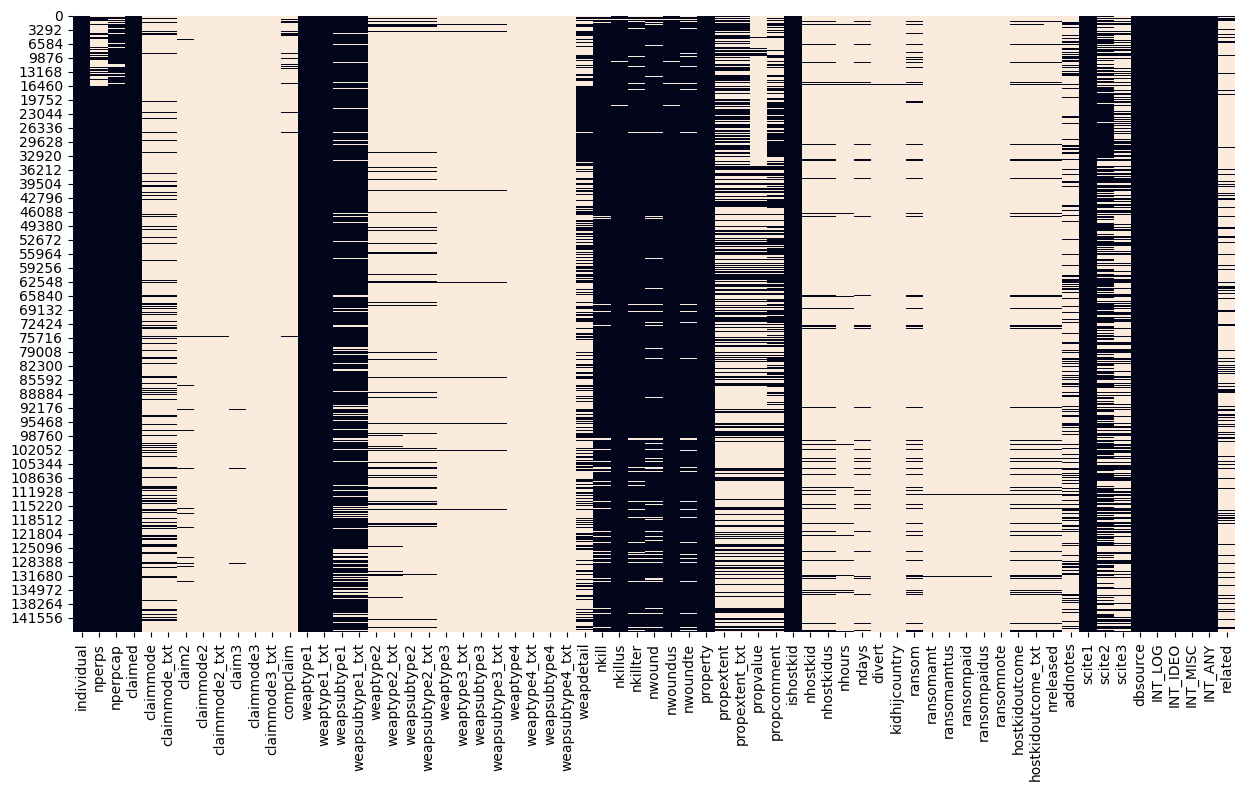

In [ ]:
plt.figure(figsize=(15, 8));
sns.heatmap(subset_df2.isnull(), cbar=False);

In [ ]:
df.iyear.isna().sum()

0

In [ ]:
df.imonth.isna().sum()

0

In [ ]:
df.iday.isna().sum()

0

In [ ]:
df.loc[(df['iday'] == 0) & pd.isna(df['approxdate'])]

eventid  iyear  imonth  iday approxdate  extended resolution  \
397    200004000001   2000       4     0        NaN         1 2000-01-01   
7426   200412000001   2004      12     0        NaN         1        NaT   
9072   200509000001   2005       9     0        NaN         0        NaT   
13902  200707000001   2007       7     0        NaN         0        NaT   
27795  201008070005   2010       8     0        NaN         0        NaT   
33479  201110010015   2011      10     0        NaN         0        NaT   

       country    country_txt  region  ...  \
397         45       Colombia       3  ...   
7426        95           Iraq      10  ...   
9072       217  United States       1  ...   
13902        6        Algeria      10  ...   
27795        6        Algeria      10  ...   
33479      153       Pakistan       6  ...   

                                                addnotes  \
397                                                  NaN   
7426   It appeared from the video that one of the hos...   
9072                                                 NaN   
13902  Coded as doubt terrorism proper because it is ...   
27795                                                NaN   
33479                                                NaN   

                                                  scite1  \
397    Edward F. Mickolus, Terrorism, 1996-2001 : A C...   
7426   "Militants claim to kidnap 10 Iraqis working f...   
9072   Rick Orlov, "At-Home Security OK'D For Workers...   
13902  S. Azzedine, "Search in the Wilaya of Khenchel...   
27795  Hafid Azzouzi, "Beni Ksila (Béjaïa) : Un milit...   
33479  National Post, "Anthrax Mailed to Pakistani PM...   

                                                  scite2  \
397                                                  NaN   
7426   "Militants threaten to murder 10 Iraqi hostage...   
9072   "News briefs from California," Associated Pres...   
13902                                                NaN   
27795                                                NaN   
33479  Salman Masood, "Pakistan Says Prime Minister W...   

                                                  scite3  \
397                                                  NaN   
7426                                                 NaN   
9072   David Zahniser, "Fired animal services exec ch...   
13902                                                NaN   
27795                                                NaN   
33479  Washington Post, "Pakistan Says Package Contai...   

                    dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
397                    CETIS        0         1        1       1      NaN  
7426                   CETIS        0         1        1       1      NaN  
9072        Eco Project 2010        0         1        0       1      NaN  
13902  UMD Algeria 2010-2012        0         0        0       0      NaN  
27795  UMD Algeria 2010-2012        0         0        0       0      NaN  
33479                   ISVG       -9        -9        0      -9      NaN  

[6 rows x 135 columns]

In [ ]:
df = df.drop(df[(df['iday'] == 0) & pd.isna(df['approxdate'])].index)

In [ ]:
df

eventid  iyear  imonth  iday  approxdate  extended resolution  \
0       200001010001   2000       1     1         NaN         0        NaT   
1       200001010002   2000       1     1         NaN         1        NaT   
2       200001010003   2000       1     1         NaN         0        NaT   
3       200001010004   2000       1     1         NaN         0        NaT   
4       200001010005   2000       1     1         NaN         0        NaT   
...              ...    ...     ...   ...         ...       ...        ...   
144827  202106300023   2021       6    30         NaN         0        NaT   
144828  202106300029   2021       6    30  06/30/2021         0        NaT   
144829  202106300030   2021       6    30         NaN         1 2021-07-08   
144830  202106300038   2021       6    30         NaN         0        NaT   
144831  202107020037   2021       6    30         NaN         0        NaT   

        country  country_txt  region  ...  \
0           139      Namibia      11  ...   
1           139      Namibia      11  ...   
2            92        India       6  ...   
3          1003       Kosovo       9  ...   
4           182      Somalia      11  ...   
...         ...          ...     ...  ...   
144827        4  Afghanistan       6  ...   
144828      138      Myanmar       5  ...   
144829      147      Nigeria      11  ...   
144830       45     Colombia       3  ...   
144831      138      Myanmar       5  ...   

                                                 addnotes  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
144827                                                NaN   
144828                                                NaN   
144829                                                NaN   
144830                                                NaN   
144831  There is doubt that this incident meets terror...   

                                                   scite1  \
0       “Namibia: UNITA Rebels Reportedly Abduct 20 Vi...   
1       “Namibia: UNITA Rebels Reportedly Abduct 20 Vi...   
2       “Lashkar 'Suicide' Squad Attacks Army Camp in ...   
3       “Kosovo: Romany Home Attacked, 1 Person Injure...   
4       “Somalia: 'Over 6' Killed in Mogadishu Attack,...   
...                                                   ...   
144827  "Gunmen blow up power pylon in Parwan," Afghan...   
144828  "Spring Revolution Daily News for 16-30 June 2...   
144829  "Boko Haram Releases Abducted Catholic Priest ...   
144830  "Two dead and one wounded after clashes betwee...   
144831  "Spring Revolution Daily News for 2-7 July 202...   

                                                   scite2  \
0       “Namibia: 4 Injured in Shootout; UNITA 'Bandit...   
1       “Namibia: 4 Injured in Shootout; UNITA 'Bandit...   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
144827  "Provinces hit by blackout after power pylon d...   
144828                                                NaN   
144829  "Kidnapped Maiduguri Catholic Priest regains f...   
144830                                                NaN   
144831                                                NaN   

                                                   scite3  \
0       “Abducted Namibians Reportedly Still Held by U...   
1       “Abducted Namibians Reportedly Still Held by U...   
2                                                     NaN   
3                                                     NaN   
4                              

In [ ]:
df.loc[(df['iday'] == 0)]

eventid  iyear  imonth  iday                       approxdate  \
78     200001110004   2000       1     0                       01/04/2000   
165    200001280007   2000       1     0              January 27-28, 2000   
185    200002000001   2000       2     0  On or before February 16, 2000.   
186    200002000002   2000       2     0                       02/02/2000   
367    200003210003   2000       3     0                 March 1-31, 2000   
...             ...    ...     ...   ...                              ...   
34784  201112170006   2011      12     0                       12/22/2011   
34792  201112170021   2011      12     0                       12/17/2011   
34793  201112170022   2011      12     0                       12/17/2011   
34794  201112170024   2011      12     0                       12/17/2011   
34865  201112220039   2011      12     0                       12/24/2011   

       extended resolution  country               country_txt  region  ...  \
78            0        NaT      101                     Japan       4  ...   
165           1 2000-01-28       45                  Colombia       3  ...   
185           0        NaT      195                     Sudan      11  ...   
186           0        NaT      209                    Turkey      10  ...   
367           0        NaT       92                     India       6  ...   
...         ...        ...      ...                       ...     ...  ...   
34784         0        NaT      155  West Bank and Gaza Strip      10  ...   
34792         0        NaT      153                  Pakistan       6  ...   
34793         0        NaT      153                  Pakistan       6  ...   
34794         0        NaT      153                  Pakistan       6  ...   
34865         0        NaT      153                  Pakistan       6  ...   

                                                addnotes  \
78     The perpetrator also admitted responsibility f...   
165    Sources state the incident happened on differe...   
185                                                  NaN   
186    Sources mention that the incident happened at ...   
367                                                  NaN   
...                                                  ...   
34784                                                NaN   
34792                                                NaN   
34793                                                NaN   
34794                                                NaN   
34865  Some sources state that one of the children wa...   

                                                  scite1  \
78     "Japan N-plant bomb suspect admits attacks-pol...   
165    "Eleven killed in death squad attack on Colomb...   
185    "Sudan: Anti-Govt Rebels Kill 4 Civillians in ...   
186    "Turkish police detonate bomb in police chief'...   
367    "Police drive against TNLA outfits intensified...   
...                                                  ...   
34784  "Settlers attack carol singers near Nablus," M...   
34792  "Militants blow up school, house in Bannu," Da...   
34793  "Militants blow up school, house in Bannu," Da...   
34794  "Militants blow up school, house in Bannu," Da...   
34865  "Toy bomb kills boy, hurts two brothers in Pes...   

                                                  scite2  \
78     "Police send Tokaimura explosives case to pros...   
165    "Colombia - Massacre paramilitary group kills ...   
185                                                  NaN   
186                                                  NaN   
367                                                  NaN   
...                                                  ...   
34784                                                NaN   
34792  "Pakistan: Militants blow up school, house in ...   
34793  "Blast damages school in Bannu," Daily The Pos...   
34794  "Blast damages school in Bannu," Daily The Pos...   
34865  "Toy bomb explosion kills one, injures th

In [ ]:
df = df.drop(df[df['iday'] == 0].index)

In [ ]:
df

eventid  iyear  imonth  iday  approxdate  extended resolution  \
0       200001010001   2000       1     1         NaN         0        NaT   
1       200001010002   2000       1     1         NaN         1        NaT   
2       200001010003   2000       1     1         NaN         0        NaT   
3       200001010004   2000       1     1         NaN         0        NaT   
4       200001010005   2000       1     1         NaN         0        NaT   
...              ...    ...     ...   ...         ...       ...        ...   
144827  202106300023   2021       6    30         NaN         0        NaT   
144828  202106300029   2021       6    30  06/30/2021         0        NaT   
144829  202106300030   2021       6    30         NaN         1 2021-07-08   
144830  202106300038   2021       6    30         NaN         0        NaT   
144831  202107020037   2021       6    30         NaN         0        NaT   

        country  country_txt  region  ...  \
0           139      Namibia      11  ...   
1           139      Namibia      11  ...   
2            92        India       6  ...   
3          1003       Kosovo       9  ...   
4           182      Somalia      11  ...   
...         ...          ...     ...  ...   
144827        4  Afghanistan       6  ...   
144828      138      Myanmar       5  ...   
144829      147      Nigeria      11  ...   
144830       45     Colombia       3  ...   
144831      138      Myanmar       5  ...   

                                                 addnotes  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
144827                                                NaN   
144828                                                NaN   
144829                                                NaN   
144830                                                NaN   
144831  There is doubt that this incident meets terror...   

                                                   scite1  \
0       “Namibia: UNITA Rebels Reportedly Abduct 20 Vi...   
1       “Namibia: UNITA Rebels Reportedly Abduct 20 Vi...   
2       “Lashkar 'Suicide' Squad Attacks Army Camp in ...   
3       “Kosovo: Romany Home Attacked, 1 Person Injure...   
4       “Somalia: 'Over 6' Killed in Mogadishu Attack,...   
...                                                   ...   
144827  "Gunmen blow up power pylon in Parwan," Afghan...   
144828  "Spring Revolution Daily News for 16-30 June 2...   
144829  "Boko Haram Releases Abducted Catholic Priest ...   
144830  "Two dead and one wounded after clashes betwee...   
144831  "Spring Revolution Daily News for 2-7 July 202...   

                                                   scite2  \
0       “Namibia: 4 Injured in Shootout; UNITA 'Bandit...   
1       “Namibia: 4 Injured in Shootout; UNITA 'Bandit...   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
144827  "Provinces hit by blackout after power pylon d...   
144828                                                NaN   
144829  "Kidnapped Maiduguri Catholic Priest regains f...   
144830                                                NaN   
144831                                                NaN   

                                                   scite3  \
0       “Abducted Namibians Reportedly Still Held by U...   
1       “Abducted Namibians Reportedly Still Held by U...   
2                                                     NaN   
3                                                     NaN   
4                              

In [ ]:
df['date'] = df['iyear'].astype(str) + '-' + df['imonth'].astype(str) + '-' + df['iday'].astype(str)

In [ ]:
df['date']

0          2000-1-1
1          2000-1-1
2          2000-1-1
3          2000-1-1
4          2000-1-1
            ...    
144827    2021-6-30
144828    2021-6-30
144829    2021-6-30
144830    2021-6-30
144831    2021-6-30
Name: date, Length: 144581, dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df_copy = df.sort_values(by='date')

In [ ]:
df_copy

eventid  iyear  imonth  iday  approxdate  extended resolution  \
0       200001010001   2000       1     1         NaN         0        NaT   
27      200001010028   2000       1     1         NaN         0        NaT   
26      200001010027   2000       1     1         NaN         0        NaT   
25      200001010026   2000       1     1         NaN         0        NaT   
24      200001010025   2000       1     1         NaN         0        NaT   
...              ...    ...     ...   ...         ...       ...        ...   
141387  202106300022   2021       6    30         NaN         0        NaT   
141388  202106300024   2021       6    30         NaN         0        NaT   
141389  202106300025   2021       6    30  06/30/2021         0        NaT   
144817  202106300006   2021       6    30         NaN         0        NaT   
144831  202107020037   2021       6    30         NaN         0        NaT   

        country    country_txt  region  ...  \
0           139        Namibia      11  ...   
27          186      Sri Lanka       6  ...   
26          217  United States       1  ...   
25           19     Bangladesh       6  ...   
24           19     Bangladesh       6  ...   
...         ...            ...     ...  ...   
141387      228          Yemen      10  ...   
141388        4    Afghanistan       6  ...   
141389        4    Afghanistan       6  ...   
144817      123           Mali      11  ...   
144831      138        Myanmar       5  ...   

                                                   scite1  \
0       “Namibia: UNITA Rebels Reportedly Abduct 20 Vi...   
27      "Dozens Die As Fighting Intensifies In Sri Lan...   
26      "AG Hall Arsonist Sentenced to 21 Years in Pri...   
25      “Bomb Blasts Disrupt Life in Chittagong,” The ...   
24      “Bomb Blasts Disrupt Life in Chittagong,” The ...   
...                                                   ...   
141387  "Yemen Islah Party activist killed in Aden," A...   
141388  "Senior hajj, religious affairs official kille...   
141389  "Afghan forces oust militants from Shinwari di...   
144817  "Terrorism Digest: 30 Jun - 1 Jul 21," BBC Mon...   
144831  "Spring Revolution Daily News for 2-7 July 202...   

                                                   scite2  \
0       “Namibia: 4 Injured in Shootout; UNITA 'Bandit...   
27                                                    NaN   
26      Art Bukowski, "Activists planned MSU arson plo...   
25      “Bomb Blasts, Arson, Violence Mark Strike in C...   
24      “Bomb Blasts, Arson, Violence Mark Strike in C...   
...                                                   ...   
141387  "Gunmen assassinate party activist in Yemen," ...   
141388  "Gunmen Assassinate Religious Scholar in Laghm...   
141389                                                NaN   
144817                                                NaN   
144831                                                NaN   

                                                   scite3  \
0       “Abducted Namibians Reportedly Still Held by U...   
27                                                    NaN   
26      Justice Department Documents and Publications,...   
25                                                    NaN   
24                                                    NaN   
...                                                   ...   
141387                                                NaN   
141388                                                NaN   
141389                                                NaN   
144817                                                NaN   
144831                                                NaN   

                                        dbsource  INT_LOG  INT_IDEO  INT_MISC  \
0                                          CETIS        1         1         0   
27      UMD Encyclopedia of World Terrorism 2012        0         1         0   
26                              Eco Project 2010        0         1  

In [ ]:
df_copy = df_copy.drop(['iyear', 'imonth', 'iday', 'approxdate'], axis=1)

In [ ]:
df_copy.head(5)

eventid  extended resolution  country    country_txt  region  \
0   200001010001         0        NaT      139        Namibia      11   
27  200001010028         0        NaT      186      Sri Lanka       6   
26  200001010027         0        NaT      217  United States       1   
25  200001010026         0        NaT       19     Bangladesh       6   
24  200001010025         0        NaT       19     Bangladesh       6   

            region_txt   provstate        city   latitude  ...  \
0   Sub-Saharan Africa     Kavango    Muitjiku -17.910812  ...   
27          South Asia    Northern  Iyakachchi   9.563842  ...   
26       North America    Michigan      Mesick  44.405705  ...   
25          South Asia  Chittagong  Chittagong  22.341896  ...   
24          South Asia  Chittagong  Chittagong  22.341896  ...   

                                               scite1  \
0   “Namibia: UNITA Rebels Reportedly Abduct 20 Vi...   
27  "Dozens Die As Fighting Intensifies In Sri Lan...   
26  "AG Hall Arsonist Sentenced to 21 Years in Pri...   
25  “Bomb Blasts Disrupt Life in Chittagong,” The ...   
24  “Bomb Blasts Disrupt Life in Chittagong,” The ...   

                                               scite2  \
0   “Namibia: 4 Injured in Shootout; UNITA 'Bandit...   
27                                                NaN   
26  Art Bukowski, "Activists planned MSU arson plo...   
25  “Bomb Blasts, Arson, Violence Mark Strike in C...   
24  “Bomb Blasts, Arson, Violence Mark Strike in C...   

                                               scite3  \
0   “Abducted Namibians Reportedly Still Held by U...   
27                                                NaN   
26  Justice Department Documents and Publications,...   
25                                                NaN   
24                                                NaN   

                                    dbsource INT_LOG  INT_IDEO  INT_MISC  \
0                                      CETIS       1         1         0   
27  UMD Encyclopedia of World Terrorism 2012       0         1         0   
26                          Eco Project 2010       0         1         0   
25                                     CETIS      -9        -9         0   
24                                     CETIS      -9        -9         0   

    INT_ANY                                            related       date  
0         1                         200001010001, 200001010002 2000-01-01  
27        1                                                NaN 2000-01-01  
26        1                                                NaN 2000-01-01  
25       -9  200001010006, 200001010012, 200001010013, 2000... 2000-01-01  
24       -9  200001010006, 200001010012, 200001010013, 2000... 2000-01-01  

[5 rows x 132 columns]

In [ ]:
df_copy['country_txt'].unique()

array(['Namibia', 'Sri Lanka', 'United States', 'Bangladesh', 'India',
       'Somalia', 'Kosovo', 'Turkey', 'Spain', 'Germany', 'Algeria',
       'Colombia', 'Greece', 'Yemen', 'Lebanon', 'Armenia', 'Uganda',
       'Nigeria', 'Russia', 'Slovak Republic', 'United Kingdom', 'Italy',
       'Sudan', 'Iraq', 'Indonesia', 'Yugoslavia', 'Iran',
       'Bosnia-Herzegovina', 'Macedonia', 'Zambia', 'South Africa',
       'France', 'Nepal', 'Mozambique', 'Angola', 'Thailand',
       'Switzerland', 'Pakistan', 'Israel', 'Philippines', 'Burundi',
       'Ecuador', 'Paraguay', 'Georgia', 'Peru', 'Afghanistan', 'Mexico',
       'China', 'Tajikistan', 'Senegal', 'Belize', 'East Timor',
       'Nicaragua', 'West Bank and Gaza Strip', 'Azerbaijan', 'Brazil',
       'Laos', 'Haiti', 'Malaysia', 'Sierra Leone', 'Kenya', 'Canada',
       'Tunisia', 'Rwanda', 'Croatia', 'Kyrgyzstan', 'Japan', 'Latvia',
       'Netherlands', 'Zimbabwe', 'Democratic Republic of the Congo',
       'Guatemala', 'Fiji', 'Hong

In [ ]:
df_copy.loc[df_copy['country_txt'] == 'International']

eventid  extended resolution  country    country_txt  region  \
4835  200210060001         0        NaT      422  International      10   

                      region_txt     provstate          city   latitude  ...  \
4835  Middle East & North Africa  Gulf of Aden  Gulf of Aden  12.533136  ...   

                                                 scite1  \
4835  British Broadcasting Service “Yemen ship attac...   

                                                 scite2  scite3 dbsource  \
4835  British Broadcasting Service “Hunt on for Yeme...     NaN  Sageman   

     INT_LOG  INT_IDEO  INT_MISC  INT_ANY  related       date  
4835       0         1         1        1      NaN 2002-10-06  

[1 rows x 132 columns]

In [ ]:
df_copy = df_copy.drop(df_copy[df_copy['country_txt'] == 'International'].index)

In [ ]:
df_copy = df_copy.drop(['resolution', 'location', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
                        'targtype2', 'targtype2_txt',	'targsubtype2',	'targsubtype2_txt',	'corp2',	'target2',	'natlty2',	'natlty2_txt',
                        'targtype3', 'targtype3_txt',	'targsubtype3',	'targsubtype3_txt',	'corp3',	'target3',	'natlty3',	'natlty3_txt'], axis=1)

In [ ]:
df_copy = df_copy.drop(['gsubname',	'gname2',	'gsubname2',	'gname3',	'gsubname3', 'guncertain2',	'guncertain3',
                        'claimmode_txt',	'claim2',	'claimmode2',	'claimmode2_txt',	'claim3',	'claimmode3',	'claimmode3_txt',	'compclaim',
                        'weaptype2',	'weaptype2_txt',	'weapsubtype2',	'weapsubtype2_txt',	'weaptype3',	'weaptype3_txt',	'weapsubtype3',	'weapsubtype3_txt',
                        'weaptype4',	'weaptype4_txt',	'weapsubtype4',	'weapsubtype4_txt',
                        'nhostkidus',	'nhours',	'ndays',	'divert',	'kidhijcountry',
                        'ransom',	'ransomamt',	'ransomamtus',	'ransompaid',	'ransompaidus',	'ransomnote',	'hostkidoutcome',	'hostkidoutcome_txt',	'nreleased', 'related'], axis=1)

In [ ]:
df_copy.head()

eventid  extended  country    country_txt  region  \
0   200001010001         0      139        Namibia      11   
27  200001010028         0      186      Sri Lanka       6   
26  200001010027         0      217  United States       1   
25  200001010026         0       19     Bangladesh       6   
24  200001010025         0       19     Bangladesh       6   

            region_txt   provstate        city   latitude  longitude  ...  \
0   Sub-Saharan Africa     Kavango    Muitjiku -17.910812  19.988303  ...   
27          South Asia    Northern  Iyakachchi   9.563842  80.399966  ...   
26       North America    Michigan      Mesick  44.405705 -85.714454  ...   
25          South Asia  Chittagong  Chittagong  22.341896  91.815117  ...   
24          South Asia  Chittagong  Chittagong  22.341896  91.815117  ...   

                                             addnotes  \
0                                                 NaN   
27  No mention was made of the assailants' weapons...   
26  The four perpetrators were also indicted for t...   
25                                                NaN   
24                                                NaN   

                                               scite1  \
0   “Namibia: UNITA Rebels Reportedly Abduct 20 Vi...   
27  "Dozens Die As Fighting Intensifies In Sri Lan...   
26  "AG Hall Arsonist Sentenced to 21 Years in Pri...   
25  “Bomb Blasts Disrupt Life in Chittagong,” The ...   
24  “Bomb Blasts Disrupt Life in Chittagong,” The ...   

                                               scite2  \
0   “Namibia: 4 Injured in Shootout; UNITA 'Bandit...   
27                                                NaN   
26  Art Bukowski, "Activists planned MSU arson plo...   
25  “Bomb Blasts, Arson, Violence Mark Strike in C...   
24  “Bomb Blasts, Arson, Violence Mark Strike in C...   

                                               scite3  \
0   “Abducted Namibians Reportedly Still Held by U...   
27                                                NaN   
26  Justice Department Documents and Publications,...   
25                                                NaN   
24                                                NaN   

                                    dbsource  INT_LOG  INT_IDEO  INT_MISC  \
0                                      CETIS        1         1         0   
27  UMD Encyclopedia of World Terrorism 2012        0         1         0   
26                          Eco Project 2010        0         1         0   
25                                     CETIS       -9        -9         0   
24                                     CETIS       -9        -9         0   

    INT_ANY       date  
0         1 2000-01-01  
27        1 2000-01-01  
26        1 2000-01-01  
25       -9 2000-01-01  
24       -9 2000-01-01  

[5 rows x 66 columns]

In [ ]:
df_copy['year'] = df_copy['date'].dt.year

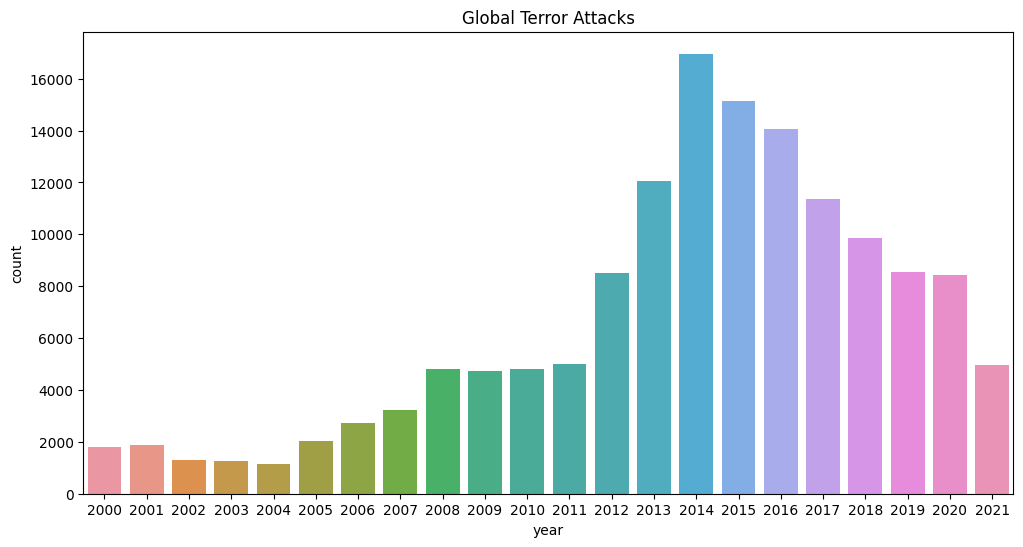

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6));
sns.countplot(df_copy, x="year");

plt.title('Global Terror Attacks')
plt.show()

In [ ]:
df_copy = df_copy.reset_index()

In [ ]:
df_copy = df_copy.drop('index', axis=1)

In [ ]:
dj_df = dj_df.reset_index()

In [ ]:
dj_df = dj_df.drop('index', axis=1)

In [ ]:
dj_df['Year'] = dj_df['Date'].dt.year

In [ ]:
dj_df = dj_df.drop('Unnamed: 0', axis=1)

In [ ]:
df_copy['nperps'].unique()

array([      nan, -9.90e+01,  4.00e+00,  1.00e+01,  1.00e+02,  1.00e+00,
        6.00e+00,  2.00e+00,  3.00e+01,  5.00e+01,  3.00e+00,  2.00e+01,
        2.00e+02,  8.00e+01,  5.00e+00,  1.70e+01,  3.20e+03,  1.50e+02,
        9.00e+00,  2.50e+01,  1.50e+01,  7.00e+00,  1.20e+01,  5.00e+02,
        8.00e+00,  7.50e+01,  6.00e+01,  1.30e+01,  3.00e+02,  4.00e+01,
        5.00e+03,  1.00e+03,  5.10e+01,  7.00e+01,  3.10e+01,  2.40e+01,
        2.10e+01,  2.50e+02,  4.00e+02,  1.40e+01,  3.60e+01,  4.50e+02,
        1.20e+02,  6.00e+02,  1.10e+01,  9.00e+01,  2.70e+01,  4.10e+01,
        1.80e+01,  4.50e+01,  1.30e+02,  8.70e+01,  3.00e+03,  2.00e+03,
        0.00e+00,  1.40e+02,  8.40e+01,  1.90e+01,  1.60e+01,  3.50e+01,
        5.50e+01,  5.20e+01, -9.00e+00,  2.30e+02,  2.20e+01,  1.56e+02,
        2.90e+01,  5.50e+02,  8.00e+02,  1.25e+02,  1.51e+02,  2.80e+01,
        5.30e+01,  3.30e+01,  2.30e+01,  1.50e+03,  1.73e+02,  2.07e+02,
        5.40e+01,  3.50e+02,  5.90e+01,  6.40e+01, 

In [ ]:
df_copy['nperps'] = df_copy['nperps'].fillna(0)

In [ ]:
df_copy['nperps'].replace(-99, 0, inplace=True)

In [ ]:
df_copy['nperps'].replace(-9, 0, inplace=True)

In [ ]:
df_copy['nperps'] = df_copy['nperps'].astype(int)

In [ ]:
df_copy['nkill'].unique()

array([0.000e+00, 6.300e+01,       nan, 1.000e+00, 6.000e+00, 5.000e+00,
       1.800e+01, 2.000e+00, 3.000e+00, 1.100e+01, 1.000e+01, 2.000e+01,
       4.000e+00, 3.600e+01, 2.400e+01, 9.000e+00, 1.400e+01, 1.500e+01,
       1.200e+01, 2.800e+01, 8.000e+00, 3.100e+01, 7.000e+00, 2.200e+01,
       4.400e+01, 1.600e+01, 1.300e+01, 2.000e+02, 3.500e+01, 2.900e+01,
       2.100e+01, 2.300e+01, 1.900e+01, 2.500e+01, 3.400e+01, 1.700e+01,
       5.000e+01, 3.000e+01, 7.400e+01, 4.700e+01, 3.300e+01, 6.000e+01,
       4.800e+01, 2.600e+01, 1.500e+02, 3.800e+01, 1.290e+02, 9.500e+01,
       7.000e+01, 2.590e+02, 3.200e+01, 1.900e+02, 1.385e+03, 5.200e+01,
       1.020e+02, 2.700e+01, 1.700e+02, 1.190e+02, 1.400e+02, 7.900e+01,
       7.800e+01, 4.300e+01, 4.900e+01, 1.010e+02, 5.700e+01, 5.900e+01,
       5.300e+01, 4.000e+01, 1.000e+02, 5.600e+01, 7.100e+01, 1.160e+02,
       5.800e+01, 1.100e+02, 4.100e+01, 3.700e+01, 7.300e+01, 6.200e+01,
       5.180e+02, 4.600e+01, 3.440e+02, 5.100e+01, 

In [ ]:
df_copy['nkill'] = df_copy['nkill'].fillna(0)

In [ ]:
df_copy['nkill'] = df_copy['nkill'].astype(int)

In [ ]:
df_copy['nkillter'] = df_copy['nkillter'].fillna(0)
df_copy['nwound'] = df_copy['nwound'].fillna(0)
df_copy['nwoundte'] = df_copy['nwoundte'].fillna(0)

In [ ]:
df_copy['nkillter'] = df_copy['nkillter'].astype(int)
df_copy['nwound'] = df_copy['nwound'].astype(int)
df_copy['nwoundte'] = df_copy['nwoundte'].astype(int)

In [ ]:
agg_terror_df = df_copy.groupby(['date']).agg({'country':'count', 'nperps': 'sum', 'nkill': 'sum', 'nkillter':'sum', 'nwound':'sum', 'nwoundte':'sum'}).reset_index()

In [ ]:
agg_terror_df

date  country  nperps  nkill  nkillter  nwound  nwoundte
0    2000-01-01       28       4     70        50      62         0
1    2000-01-02        4      10      5         0       0         0
2    2000-01-03       11       0     29         1      48         0
3    2000-01-04        5     100      0         0       2         0
4    2000-01-05        4       1     12         1      25         0
...         ...      ...     ...    ...       ...     ...       ...
7677 2021-06-26       46      14    119        49      51         0
7678 2021-06-27       56      59    164        65      99        17
7679 2021-06-28       35      21     27         4      30         0
7680 2021-06-29       31      12     43        14      37         0
7681 2021-06-30       26       1     22         3      24         0

[7682 rows x 7 columns]

In [ ]:
merged_df = pd.merge(agg_terror_df, dj_df, left_on='date', right_on='Date', how='inner')

In [ ]:
merged_df

date  country  nperps  nkill  nkillter  nwound  nwoundte  \
0    2000-01-02        4      10      5         0       0         0   
1    2000-01-03       11       0     29         1      48         0   
2    2000-01-05        4       1     12         1      25         0   
3    2000-01-06        3       0      0         0      23         0   
4    2000-01-08        8       1      8         1       4         0   
...         ...      ...     ...    ...       ...     ...       ...   
5292 2021-06-24       25      56     41         0      15         0   
5293 2021-06-25       31       6     39         2      42         1   
5294 2021-06-28       35      21     27         4      30         0   
5295 2021-06-29       31      12     43        14      37         0   
5296 2021-06-30       26       1     22         3      24         0   

           Date     Price      Open      High       Low     Vol. Change %  \
0    2000-01-02  11041.06  10937.74  11073.32  10907.96  183.04M    0.92%   
1    2000-01-03  10137.93  10128.11  10186.33  10084.56  216.78M    0.09%   
2    2000-01-05  10811.79  10749.42  10926.26  10724.22  174.02M    0.73%   
3    2000-01-06  10652.20  10532.27  10673.45  10513.08  183.99M    1.23%   
4    2000-01-08  10606.95  10523.81  10626.92  10516.76  151.42M    0.81%   
...         ...       ...       ...       ...       ...      ...      ...   
5292 2021-06-24  34196.82  33933.91  34233.02  33933.91  279.38M    0.95%   
5293 2021-06-25  34433.84  34328.10  34501.02  34314.80  456.03M    0.69%   
5294 2021-06-28  34283.27  34428.10  34449.65  34186.13  281.29M   -0.44%   
5295 2021-06-29  34292.29  34338.89  34469.83  34266.83  288.65M    0.03%   
5296 2021-06-30  34502.51  34290.74  34553.16  34245.48  298.63M    0.61%   

      Year  
0     2000  
1     2000  
2     2000  
3     2000  
4     2000  
...    ...  
5292  2021  
5293  2021  
5294  2021  
5295  2021  
5296  2021  

[5297 rows x 15 columns]

In [ ]:
merged_df['casualty'] = merged_df['nkill'] + merged_df['nwound']

<Axes: xlabel='casualty', ylabel='Count'>

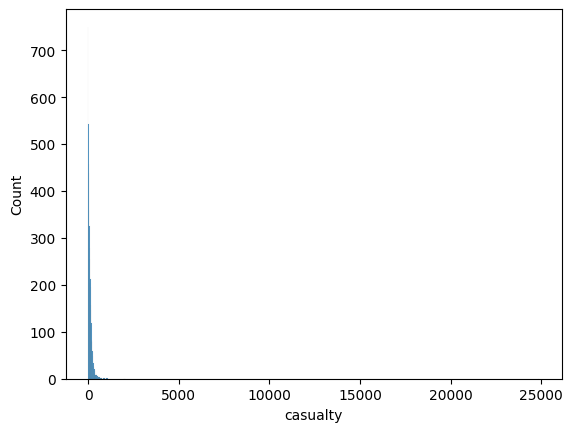

In [ ]:
sns.histplot(merged_df, x='casualty' )

<Axes: xlabel='country', ylabel='Count'>

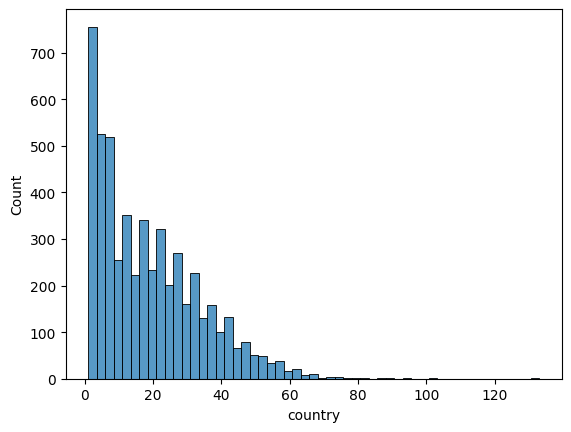

In [ ]:
sns.histplot(merged_df, x='country' )

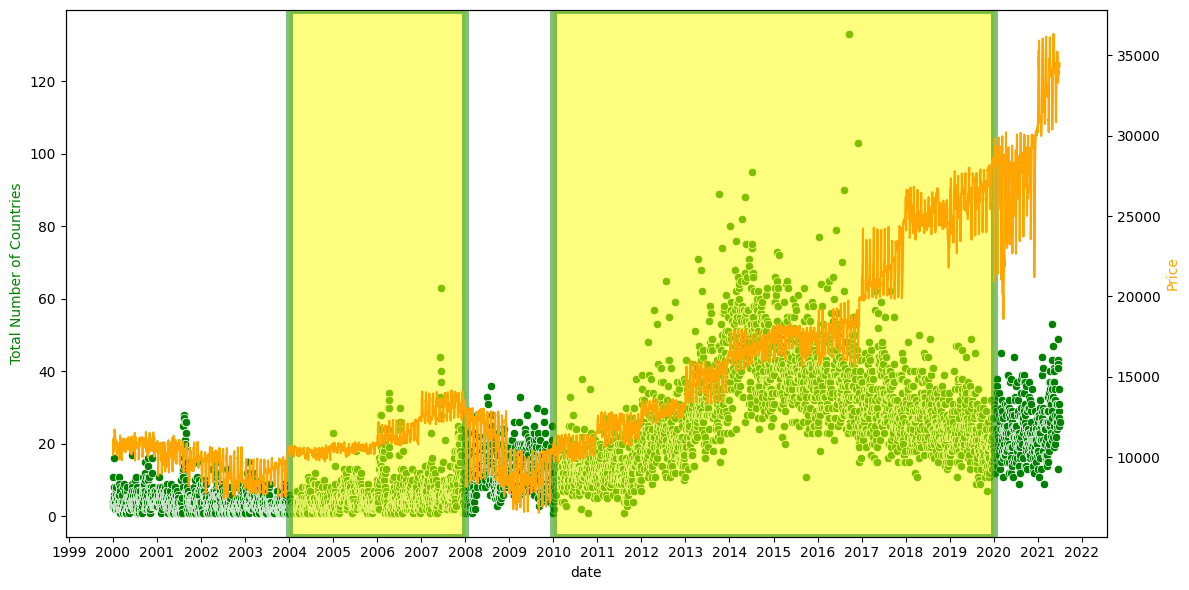

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=merged_df, x='date', y='country', ax=ax1, color='green')
ax1.set_ylabel('Total Number of Countries', color='green')

ax2 = ax1.twinx()

sns.lineplot(data=merged_df, x='date', y='Price', ax=ax2, color='orange')
ax2.set_ylabel('Price', color='orange')

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)

plt.xticks(rotation=45)

boom_start1 = dt(2004, 1, 1)
boom_end1 = dt(2007, 12, 31)

plt.axvspan(boom_start1, boom_end1, facecolor='yellow', alpha=0.5, edgecolor='green', linewidth=5)

boom_start2 = dt(2010, 1, 1)
boom_end2 = dt(2019, 12, 31)

plt.axvspan(boom_start2, boom_end2, facecolor='yellow', alpha=0.5, edgecolor='green', linewidth=5)

plt.tight_layout()

plt.show()


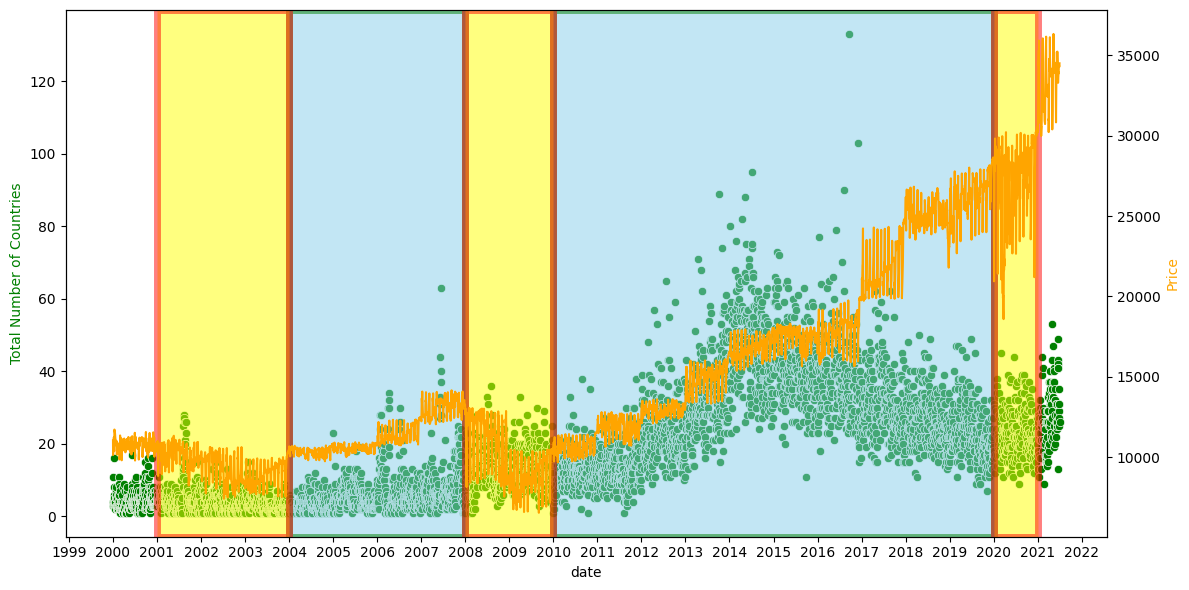

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=merged_df, x='date', y='country', ax=ax1, color='green')
ax1.set_ylabel('Total Number of Countries', color='green')

ax2 = ax1.twinx()

sns.lineplot(data=merged_df, x='date', y='Price', ax=ax2, color='orange')
ax2.set_ylabel('Price', color='orange')

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)

plt.xticks(rotation=45)

boom_start1 = dt(2004, 1, 1)
boom_end1 = dt(2007, 12, 31)

plt.axvspan(boom_start1, boom_end1, facecolor='skyblue', alpha=0.5, edgecolor='green', linewidth=5)

boom_start2 = dt(2010, 1, 1)
boom_end2 = dt(2019, 12, 31)

plt.axvspan(boom_start2, boom_end2, facecolor='skyblue', alpha=0.5, edgecolor='green', linewidth=5)

rec_start1 = dt(2001, 1, 1)
rec_end1 = dt(2003, 12, 31)

plt.axvspan(rec_start1, rec_end1, facecolor='yellow', alpha=0.5, edgecolor='red', linewidth=5)

rec_start2 = dt(2008, 1, 1)
rec_end2 = dt(2009, 12, 31)

plt.axvspan(rec_start2, rec_end2, facecolor='yellow', alpha=0.5, edgecolor='red', linewidth=5)

rec_start3 = dt(2020, 1, 1)
rec_end3 = dt(2020, 12, 31)

plt.axvspan(rec_start3, rec_end3, facecolor='yellow', alpha=0.5, edgecolor='red', linewidth=5)

plt.tight_layout()

plt.show()


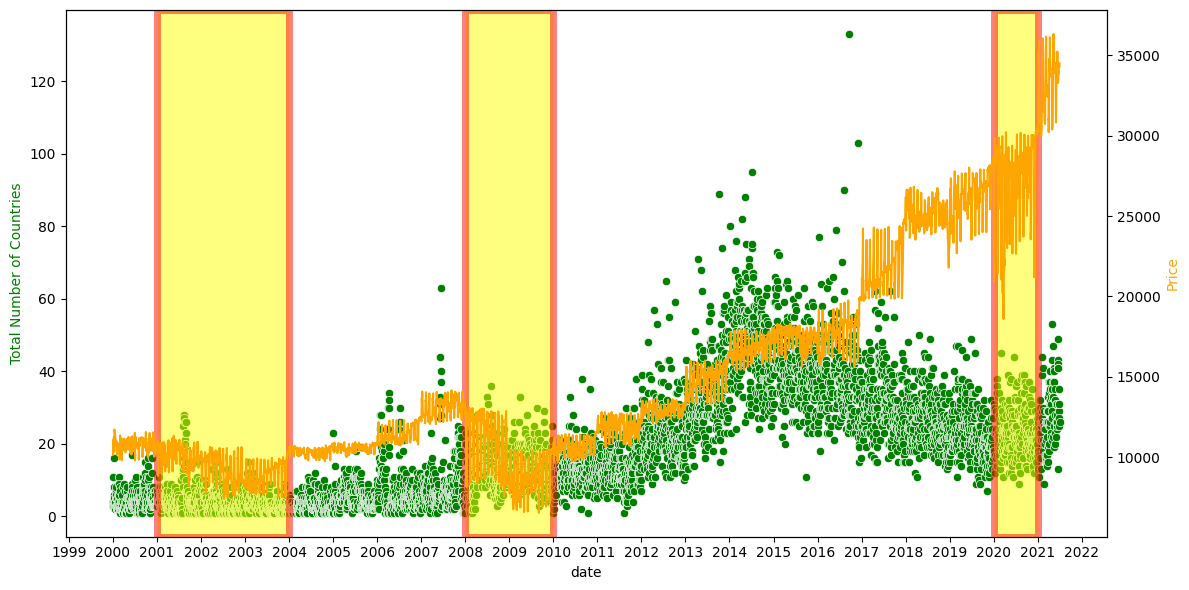

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=merged_df, x='date', y='country', ax=ax1, color='green')
ax1.set_ylabel('Total Number of Countries', color='green')

ax2 = ax1.twinx()

sns.lineplot(data=merged_df, x='date', y='Price', ax=ax2, color='orange')
ax2.set_ylabel('Price', color='orange')

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)

plt.xticks(rotation=45)

rec_start1 = dt(2001, 1, 1)
rec_end1 = dt(2003, 12, 31)

plt.axvspan(rec_start1, rec_end1, facecolor='yellow', alpha=0.5, edgecolor='red', linewidth=5)

rec_start2 = dt(2008, 1, 1)
rec_end2 = dt(2009, 12, 31)

plt.axvspan(rec_start2, rec_end2, facecolor='yellow', alpha=0.5, edgecolor='red', linewidth=5)

rec_start3 = dt(2020, 1, 1)
rec_end3 = dt(2020, 12, 31)

plt.axvspan(rec_start3, rec_end3, facecolor='yellow', alpha=0.5, edgecolor='red', linewidth=5)

plt.tight_layout()

plt.show()


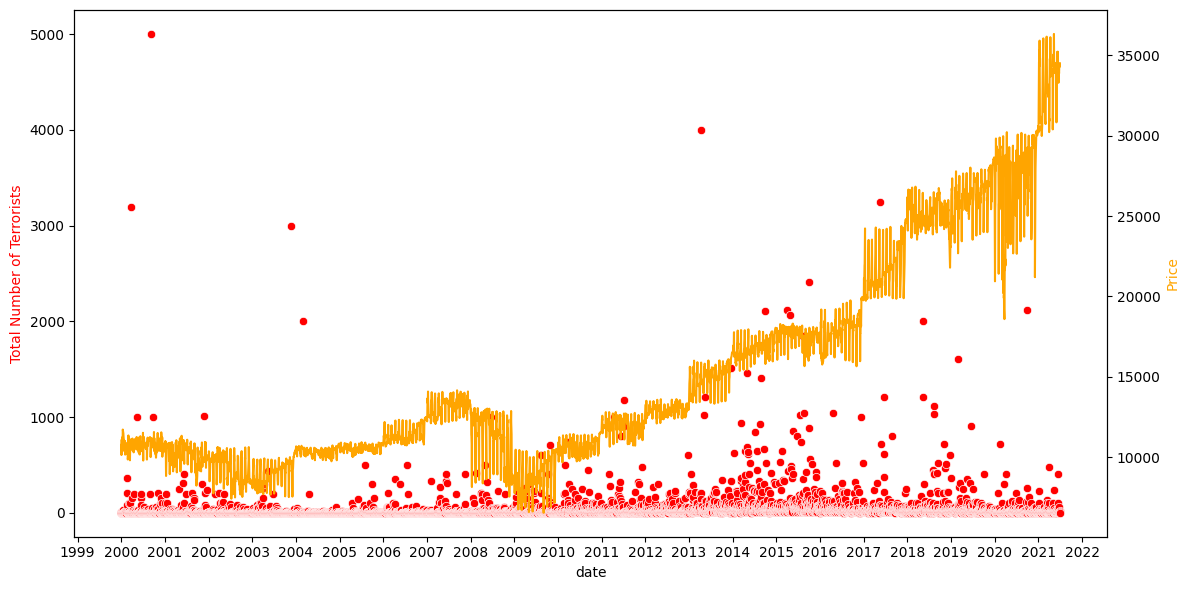

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=merged_df, x='date', y='nperps', ax=ax1, color='red')
ax1.set_ylabel('Total Number of Terrorists', color='red')

ax2 = ax1.twinx()

sns.lineplot(data=merged_df, x='date', y='Price', ax=ax2, color='orange')
ax2.set_ylabel('Price', color='orange')

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)

plt.tight_layout()

plt.show()


In [ ]:
merged_df_perps = merged_df.loc[merged_df['nperps']!=0]

In [ ]:
merged_df_perps

date  country  nperps  nkill  nkillter  nwound  nwoundte  \
0    2000-01-02        4      10      5         0       0         0   
2    2000-01-05        4       1     12         1      25         0   
4    2000-01-08        8       1      8         1       4         0   
7    2000-01-12       16       1     24         3       7         0   
9    2000-01-14        5       1      9         0      10         0   
...         ...      ...     ...    ...       ...     ...       ...   
5292 2021-06-24       25      56     41         0      15         0   
5293 2021-06-25       31       6     39         2      42         1   
5294 2021-06-28       35      21     27         4      30         0   
5295 2021-06-29       31      12     43        14      37         0   
5296 2021-06-30       26       1     22         3      24         0   

           Date     Price      Open      High       Low     Vol. Change %  \
0    2000-01-02  11041.06  10937.74  11073.32  10907.96  183.04M    0.92%   
2    2000-01-05  10811.79  10749.42  10926.26  10724.22  174.02M    0.73%   
4    2000-01-08  10606.95  10523.81  10626.92  10516.76  151.42M    0.81%   
7    2000-01-12  10373.54  10416.76  10524.45  10348.70  301.73M   -0.39%   
9    2000-01-14  11722.98  11619.35  11750.28  11612.53  238.62M    1.21%   
...         ...       ...       ...       ...       ...      ...      ...   
5292 2021-06-24  34196.82  33933.91  34233.02  33933.91  279.38M    0.95%   
5293 2021-06-25  34433.84  34328.10  34501.02  34314.80  456.03M    0.69%   
5294 2021-06-28  34283.27  34428.10  34449.65  34186.13  281.29M   -0.44%   
5295 2021-06-29  34292.29  34338.89  34469.83  34266.83  288.65M    0.03%   
5296 2021-06-30  34502.51  34290.74  34553.16  34245.48  298.63M    0.61%   

      Year  casualty  
0     2000         5  
2     2000        37  
4     2000        12  
7     2000        31  
9     2000        19  
...    ...       ...  
5292  2021        56  
5293  2021        81  
5294  2021        57  
5295  2021        80  
5296  2021        46  

[4293 rows x 16 columns]

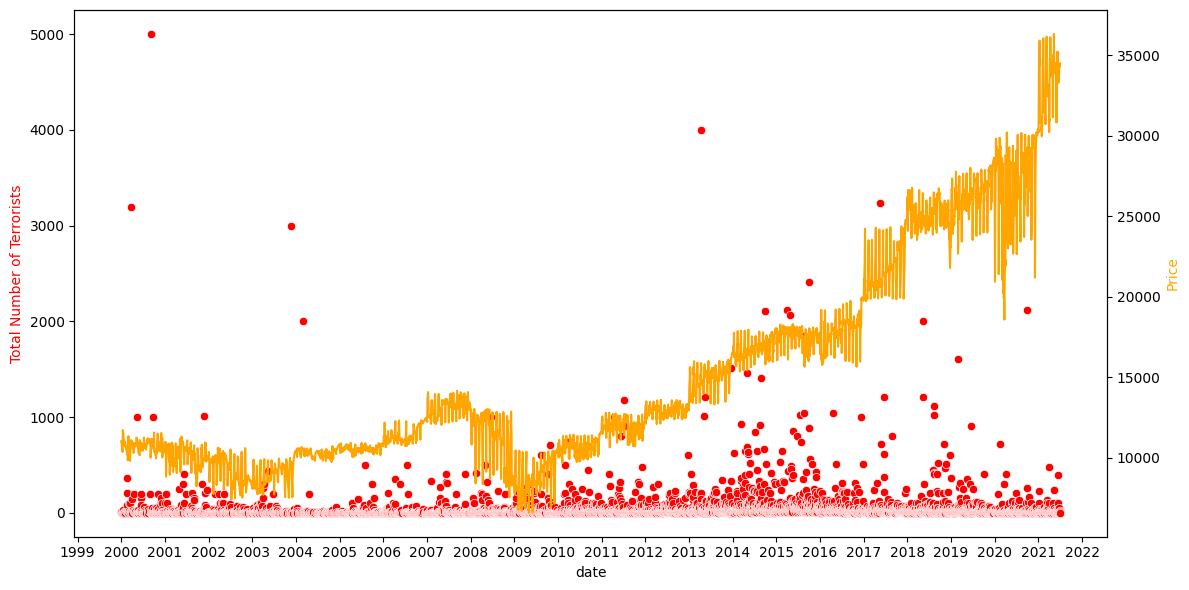

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=merged_df_perps, x='date', y='nperps', ax=ax1, color='red')
ax1.set_ylabel('Total Number of Terrorists', color='red')

ax2 = ax1.twinx()

sns.lineplot(data=merged_df_perps, x='date', y='Price', ax=ax2, color='orange')
ax2.set_ylabel('Price', color='orange')

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)

plt.tight_layout()

plt.show()


In [ ]:
max_nperps_row = merged_df.loc[merged_df['nperps'].idxmax()]
print(max_nperps_row)

date        2000-09-06 00:00:00
country                       8
nperps                     5003
nkill                         4
nkillter                      0
nwound                        2
nwoundte                      0
Date        2000-09-06 00:00:00
Price                  10614.07
Open                   10678.47
High                   10763.77
Low                    10588.29
Vol.                    136.75M
Change %                 -0.51%
Year                       2000
casualty                      6
Name: 167, dtype: object


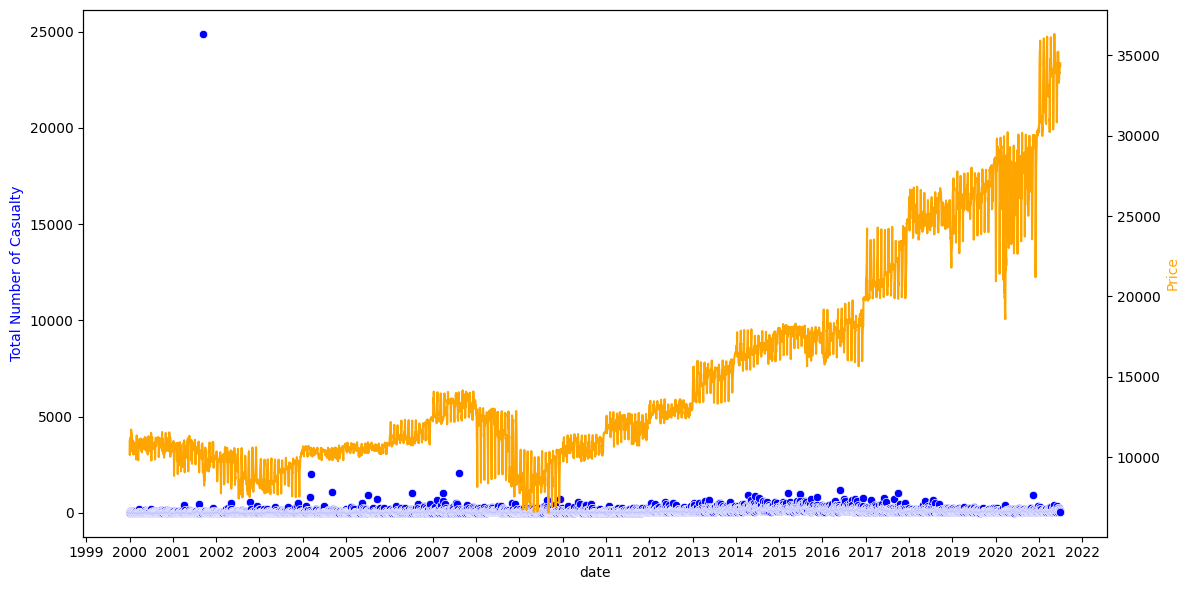

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=merged_df, x='date', y='casualty', ax=ax1, color='blue')
ax1.set_ylabel('Total Number of Casualty', color='blue')

ax2 = ax1.twinx()

sns.lineplot(data=merged_df, x='date', y='Price', ax=ax2, color='orange')
ax2.set_ylabel('Price', color='orange')

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)

plt.tight_layout()

plt.show()


In [ ]:
max_casualty_row = merged_df.loc[merged_df['casualty'].idxmax()]
print(max_casualty_row)

date        2001-09-11 00:00:00
country                       8
nperps                       19
nkill                      3012
nkillter                     19
nwound                    21872
nwoundte                      0
Date        2001-09-11 00:00:00
Price                    9608.0
Open                    9586.96
High                    9630.41
Low                     9519.77
Vol.                    174.67M
Change %                  0.21%
Year                       2001
casualty                  24884
Name: 415, dtype: object


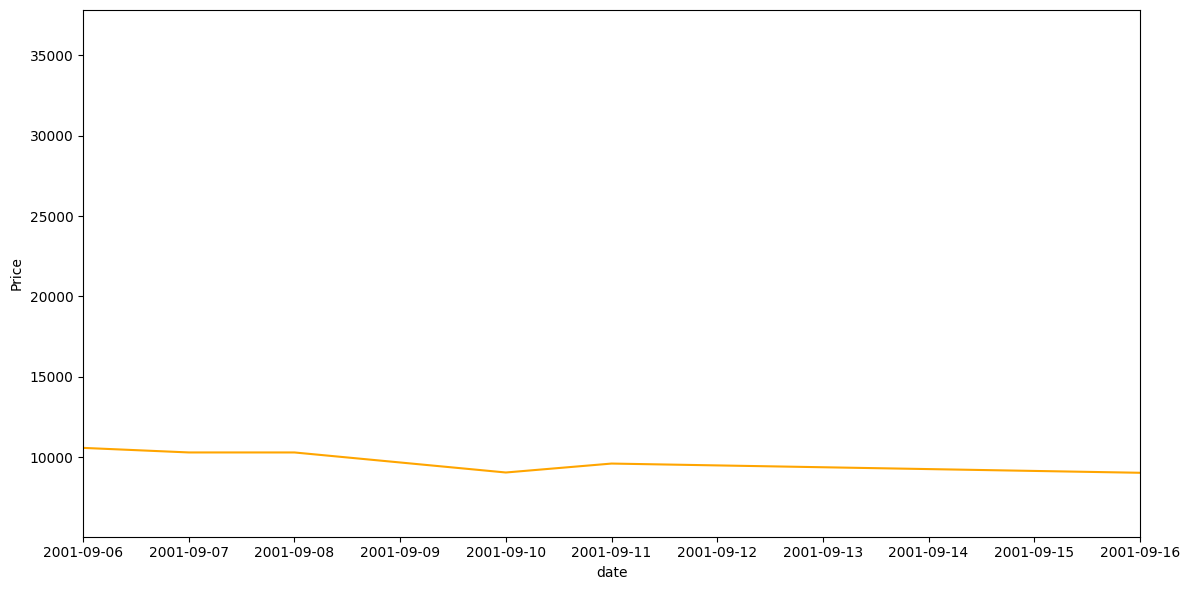

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=merged_df, x='date', y='Price', color='orange')
ax.set_ylabel('Price')

start_date = pd.to_datetime('2001-09-06')
end_date = pd.to_datetime('2001-09-16')

ax.set_xlim(start_date, end_date)

plt.tight_layout()

plt.show()


In [ ]:
merged_big_df = pd.merge(df_copy, dj_df, left_on='date', right_on='Date', how='inner')

In [ ]:
merged_big_df

eventid  extended  country    country_txt  region  \
0      200001020001         0       75        Germany       8   
1      200001020002         1        6        Algeria      10   
2      200001020003         0       45       Colombia       3   
3      200001020004         0       45       Colombia       3   
4      200001030008         0      217  United States       1   
...             ...       ...      ...            ...     ...   
99781  202106300022         0      228          Yemen      10   
99782  202106300024         0        4    Afghanistan       6   
99783  202106300025         0        4    Afghanistan       6   
99784  202106300006         0      123           Mali      11   
99785  202107020037         0      138        Myanmar       5   

                       region_txt  provstate           city   latitude  \
0                  Western Europe  Thuringia         Erfurt  50.973734   
1      Middle East & North Africa      Medea      El Omaria  36.264580   
2                   South America     Bogota         Bogota   4.667128   
3                   South America  Antioquia        Unknown   7.198606   
4                   North America       Ohio     Cincinnati  39.103175   
...                           ...        ...            ...        ...   
99781  Middle East & North Africa       Adan  Shaykh Uthman  12.867140   
99782                  South Asia    Laghman      Mihtarlam  34.674867   
99783                  South Asia      Balkh       Hairatan  37.214978   
99784          Sub-Saharan Africa        Gao     Labbezenga  16.912033   
99785              Southeast Asia       Shan    Kaungmutone  23.974583   

       longitude  ...       date  year       Date     Price      Open  \
0      11.022435  ... 2000-01-02  2000 2000-01-02  11041.06  10937.74   
1       3.030830  ... 2000-01-02  2000 2000-01-02  11041.06  10937.74   
2     -74.106056  ... 2000-01-02  2000 2000-01-02  11041.06  10937.74   
3     -75.341218  ... 2000-01-02  2000 2000-01-02  11041.06  10937.74   
4     -84.511981  ... 2000-01-03  2000 2000-01-03  10137.93  10128.11   
...          ...  ...        ...   ...        ...       ...       ...   
99781  44.983957  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   
99782  70.213444  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   
99783  67.414769  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   
99784   0.299578  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   
99785  97.895734  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   

           High       Low     Vol.  Change %  Year  
0      11073.32  10907.96  183.04M     0.92%  2000  
1      11073.32  10907.96  183.04M     0.92%  2000  
2      11073.32  10907.96  183.04M     0.92%  2000  
3      11073.32  10907.96  183.04M     0.92%  2000  
4      10186.33  10084.56  216.78M     0.09%  2000  
...         ...       ...      ...       ...   ...  
99781  34553.16  34245.48  298.63M     0.61%  2021  
99782  34553.16  34245.48  298.63M     0.61%  2021  
99783  34553.16  34245.48  298.63M     0.61%  2021  
99784  34553.16  34245.48  298.63M     0.61%  2021  
99785  34553.16  34245.48  298.63M     0.61%  2021  

[99786 rows x 75 columns]

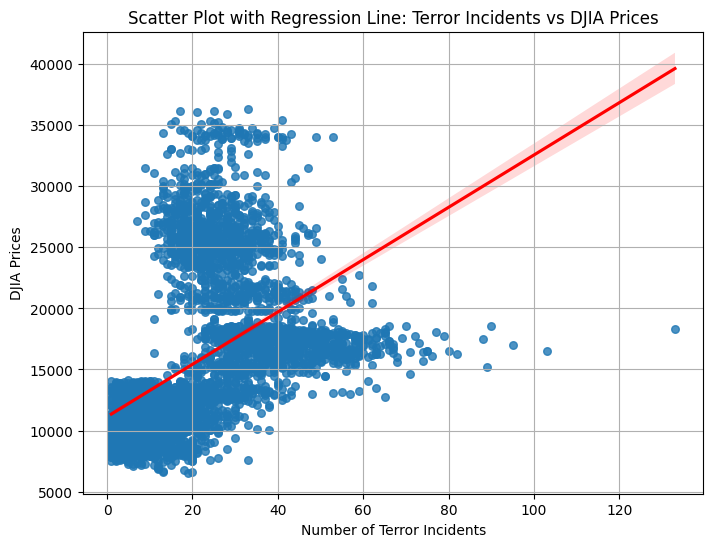

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=merged_df['country'], y=merged_df['Price'], scatter_kws={'s': 30}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: Terror Incidents vs DJIA Prices')
plt.xlabel('Number of Terror Incidents')
plt.ylabel('DJIA Prices')
plt.grid(True)
plt.show()

In [ ]:
pip install pandas scikit-learn plotly

In [ ]:
merged_big_df['latitude'].isna().sum()

678

In [ ]:
merged_big_df['longitude'].isna().sum()

678

In [ ]:
merged_big_df.loc[(merged_big_df['latitude'].isna()) & (merged_big_df['longitude'].isna())]

eventid  extended  country   country_txt  region  \
80     200001240004         0       95          Iraq      10   
106    200001280002         0      186     Sri Lanka       6   
125    200002080002         0       45      Colombia       3   
161    200002220002         0        6       Algeria      10   
213    200003080001         0        6       Algeria      10   
...             ...       ...      ...           ...     ...   
98821  202105130013         0      173  Saudi Arabia      10   
99043  202105240018         0      228         Yemen      10   
99161  202105280026         0      173  Saudi Arabia      10   
99762  202106300009         0      123          Mali      11   
99766  202106300016         0      173  Saudi Arabia      10   

                       region_txt   provstate              city  latitude  \
80     Middle East & North Africa     Unknown           Pirzeen       NaN   
106                    South Asia     Unknown           Unknown       NaN   
125                 South America     Unknown     Campo Hermoso       NaN   
161    Middle East & North Africa  Tizi Ouzou          New Town       NaN   
213    Middle East & North Africa      Djelfa  Bordj El Mahache       NaN   
...                           ...         ...               ...       ...   
98821  Middle East & North Africa     Unknown           Unknown       NaN   
99043  Middle East & North Africa     Unknown           Unknown       NaN   
99161  Middle East & North Africa     Unknown           Unknown       NaN   
99762          Sub-Saharan Africa     Unknown           Unknown       NaN   
99766  Middle East & North Africa     Unknown           Unknown       NaN   

       longitude  ...       date  year       Date     Price      Open  \
80           NaN  ... 2000-01-24  2000 2000-01-24  11008.17  11251.94   
106          NaN  ... 2000-01-28  2000 2000-01-28  10738.88  11024.92   
125          NaN  ... 2000-02-08  2000 2000-02-08  10687.53  10609.15   
161          NaN  ... 2000-02-22  2000 2000-02-22  10304.85  10219.83   
213          NaN  ... 2000-03-08  2000 2000-03-08  10706.58  10679.37   
...          ...  ...        ...   ...        ...       ...       ...   
98821        NaN  ... 2021-05-13  2021 2021-05-13  34021.45  33624.74   
99043        NaN  ... 2021-05-24  2021 2021-05-24  34393.98  34253.87   
99161        NaN  ... 2021-05-28  2021 2021-05-28  34529.45  34558.50   
99762        NaN  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   
99766        NaN  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   

           High       Low     Vol.  Change %  Year  
80     11366.50  10917.27  202.74M    -2.16%  2000  
106    11024.92  10735.77  183.06M    -2.62%  2000  
125    10724.53  10587.54  163.40M     0.76%  2000  
161    10336.79  10103.80  194.20M     0.83%  2000  
213    10744.31  10623.44  161.58M     0.18%  2000  
...         ...       ...      ...       ...   ...  
98821  34181.77  33623.49  352.81M     1.29%  2021  
99043  34472.51  34253.87  251.81M     0.54%  2021  
99161  34631.11  34520.09  290.85M     0.19%  2021  
99762  34553.16  34245.48  298.63M     0.61%  2021  
99766  34553.16  34245.48  298.63M     0.61%  2021  

[678 rows x 75 columns]

In [ ]:
from sklearn.impute import SimpleImputer

missing_data = merged_big_df[merged_big_df['longitude'].isnull() | merged_big_df['latitude'].isnull()]

country_means = merged_big_df.groupby('country')[['longitude', 'latitude']].mean()

imputer = SimpleImputer(strategy='mean')

imputer.fit(country_means)

missing_data[['longitude', 'latitude']] = imputer.transform(missing_data[['longitude', 'latitude']])

<ipython-input-90-c931f8f8483c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data[['longitude', 'latitude']] = imputer.transform(missing_data[['longitude', 'latitude']])


In [ ]:
missing_data

eventid  extended  country   country_txt  region  \
80     200001240004         0       95          Iraq      10   
106    200001280002         0      186     Sri Lanka       6   
125    200002080002         0       45      Colombia       3   
161    200002220002         0        6       Algeria      10   
213    200003080001         0        6       Algeria      10   
...             ...       ...      ...           ...     ...   
98821  202105130013         0      173  Saudi Arabia      10   
99043  202105240018         0      228         Yemen      10   
99161  202105280026         0      173  Saudi Arabia      10   
99762  202106300009         0      123          Mali      11   
99766  202106300016         0      173  Saudi Arabia      10   

                       region_txt   provstate              city   latitude  \
80     Middle East & North Africa     Unknown           Pirzeen  20.133141   
106                    South Asia     Unknown           Unknown  20.133141   
125                 South America     Unknown     Campo Hermoso  20.133141   
161    Middle East & North Africa  Tizi Ouzou          New Town  20.133141   
213    Middle East & North Africa      Djelfa  Bordj El Mahache  20.133141   
...                           ...         ...               ...        ...   
98821  Middle East & North Africa     Unknown           Unknown  20.133141   
99043  Middle East & North Africa     Unknown           Unknown  20.133141   
99161  Middle East & North Africa     Unknown           Unknown  20.133141   
99762          Sub-Saharan Africa     Unknown           Unknown  20.133141   
99766  Middle East & North Africa     Unknown           Unknown  20.133141   

       longitude  ...       date  year       Date     Price      Open  \
80     22.252842  ... 2000-01-24  2000 2000-01-24  11008.17  11251.94   
106    22.252842  ... 2000-01-28  2000 2000-01-28  10738.88  11024.92   
125    22.252842  ... 2000-02-08  2000 2000-02-08  10687.53  10609.15   
161    22.252842  ... 2000-02-22  2000 2000-02-22  10304.85  10219.83   
213    22.252842  ... 2000-03-08  2000 2000-03-08  10706.58  10679.37   
...          ...  ...        ...   ...        ...       ...       ...   
98821  22.252842  ... 2021-05-13  2021 2021-05-13  34021.45  33624.74   
99043  22.252842  ... 2021-05-24  2021 2021-05-24  34393.98  34253.87   
99161  22.252842  ... 2021-05-28  2021 2021-05-28  34529.45  34558.50   
99762  22.252842  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   
99766  22.252842  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   

           High       Low     Vol.  Change %  Year  
80     11366.50  10917.27  202.74M    -2.16%  2000  
106    11024.92  10735.77  183.06M    -2.62%  2000  
125    10724.53  10587.54  163.40M     0.76%  2000  
161    10336.79  10103.80  194.20M     0.83%  2000  
213    10744.31  10623.44  161.58M     0.18%  2000  
...         ...       ...      ...       ...   ...  
98821  34181.77  33623.49  352.81M     1.29%  2021  
99043  34472.51  34253.87  251.81M     0.54%  2021  
99161  34631.11  34520.09  290.85M     0.19%  2021  
99762  34553.16  34245.48  298.63M     0.61%  2021  
99766  34553.16  34245.48  298.63M     0.61%  2021  

[678 rows x 75 columns]

In [ ]:
missing_data_test = merged_big_df

In [ ]:
# Linear interpolation
missing_data_test['longitude'].interpolate(method='linear', inplace=True)
missing_data_test['latitude'].interpolate(method='linear', inplace=True)

In [ ]:
missing_data_test

eventid  extended  country    country_txt  region  \
0      200001020001         0       75        Germany       8   
1      200001020002         1        6        Algeria      10   
2      200001020003         0       45       Colombia       3   
3      200001020004         0       45       Colombia       3   
4      200001030008         0      217  United States       1   
...             ...       ...      ...            ...     ...   
99781  202106300022         0      228          Yemen      10   
99782  202106300024         0        4    Afghanistan       6   
99783  202106300025         0        4    Afghanistan       6   
99784  202106300006         0      123           Mali      11   
99785  202107020037         0      138        Myanmar       5   

                       region_txt  provstate           city   latitude  \
0                  Western Europe  Thuringia         Erfurt  50.973734   
1      Middle East & North Africa      Medea      El Omaria  36.264580   
2                   South America     Bogota         Bogota   4.667128   
3                   South America  Antioquia        Unknown   7.198606   
4                   North America       Ohio     Cincinnati  39.103175   
...                           ...        ...            ...        ...   
99781  Middle East & North Africa       Adan  Shaykh Uthman  12.867140   
99782                  South Asia    Laghman      Mihtarlam  34.674867   
99783                  South Asia      Balkh       Hairatan  37.214978   
99784          Sub-Saharan Africa        Gao     Labbezenga  16.912033   
99785              Southeast Asia       Shan    Kaungmutone  23.974583   

       longitude  ...       date  year       Date     Price      Open  \
0      11.022435  ... 2000-01-02  2000 2000-01-02  11041.06  10937.74   
1       3.030830  ... 2000-01-02  2000 2000-01-02  11041.06  10937.74   
2     -74.106056  ... 2000-01-02  2000 2000-01-02  11041.06  10937.74   
3     -75.341218  ... 2000-01-02  2000 2000-01-02  11041.06  10937.74   
4     -84.511981  ... 2000-01-03  2000 2000-01-03  10137.93  10128.11   
...          ...  ...        ...   ...        ...       ...       ...   
99781  44.983957  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   
99782  70.213444  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   
99783  67.414769  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   
99784   0.299578  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   
99785  97.895734  ... 2021-06-30  2021 2021-06-30  34502.51  34290.74   

           High       Low     Vol.  Change %  Year  
0      11073.32  10907.96  183.04M     0.92%  2000  
1      11073.32  10907.96  183.04M     0.92%  2000  
2      11073.32  10907.96  183.04M     0.92%  2000  
3      11073.32  10907.96  183.04M     0.92%  2000  
4      10186.33  10084.56  216.78M     0.09%  2000  
...         ...       ...      ...       ...   ...  
99781  34553.16  34245.48  298.63M     0.61%  2021  
99782  34553.16  34245.48  298.63M     0.61%  2021  
99783  34553.16  34245.48  298.63M     0.61%  2021  
99784  34553.16  34245.48  298.63M     0.61%  2021  
99785  34553.16  34245.48  298.63M     0.61%  2021  

[99786 rows x 75 columns]

In [ ]:
missing_data_test.iloc[[80, 106, 125]]

eventid  extended  country country_txt  region  \
80   200001240004         0       95        Iraq      10   
106  200001280002         0      186   Sri Lanka       6   
125  200002080002         0       45    Colombia       3   

                     region_txt provstate           city   latitude  \
80   Middle East & North Africa   Unknown        Pirzeen  19.658294   
106                  South Asia   Unknown        Unknown  28.808858   
125               South America   Unknown  Campo Hermoso  28.416900   

     longitude  ...       date  year       Date     Price      Open      High  \
80   85.748885  ... 2000-01-24  2000 2000-01-24  11008.17  11251.94  11366.50   
106  71.000169  ... 2000-01-28  2000 2000-01-28  10738.88  11024.92  11024.92   
125  82.414186  ... 2000-02-08  2000 2000-02-08  10687.53  10609.15  10724.53   

          Low     Vol.  Change %  Year  
80   10917.27  202.74M    -2.16%  2000  
106  10735.77  183.06M    -2.62%  2000  
125  10587.54  163.40M     0.76%  2000  

[3 rows x 75 columns]

In [ ]:
missing_data_test.loc[missing_data_test['country_txt']=='Colombia']

eventid  extended  country country_txt  region     region_txt  \
2      200001020003         0       45    Colombia       3  South America   
3      200001020004         0       45    Colombia       3  South America   
32     200001090004         0       45    Colombia       3  South America   
50     200001120004         1       45    Colombia       3  South America   
51     200001120003         0       45    Colombia       3  South America   
...             ...       ...      ...         ...     ...            ...   
99656  202106240027         0       45    Colombia       3  South America   
99676  202106250017         0       45    Colombia       3  South America   
99760  202106300014         0       45    Colombia       3  South America   
99769  202106300015         0       45    Colombia       3  South America   
99771  202106300038         0       45    Colombia       3  South America   

                provstate             city  latitude  longitude  ...  \
2                  Bogota           Bogota  4.667128 -74.106056  ...   
3               Antioquia          Unknown  7.198606 -75.341218  ...   
32                 Bogota           Bogota  4.667128 -74.106056  ...   
50                 Narino           Potosi  0.806702 -77.572965  ...   
51                 Narino          Cordoba  0.853440 -77.518370  ...   
...                   ...              ...       ...        ...  ...   
99656           Antioquia  Llanos de Cuiva  6.814842 -75.485958  ...   
99676  Norte de Santander           Cucuta  7.947852 -72.525721  ...   
99760              Arauca           Fortul  6.786533 -71.775119  ...   
99769              Arauca           Fortul  6.792500 -71.775833  ...   
99771               Cauca          Unknown  3.104189 -76.333069  ...   

            date  year       Date     Price      Open      High       Low  \
2     2000-01-02  2000 2000-01-02  11041.06  10937.74  11073.32  10907.96   
3     2000-01-02  2000 2000-01-02  11041.06  10937.74  11073.32  10907.96   
32    2000-01-09  2000 2000-01-09  11238.78  11219.54  11313.60  11219.54   
50    2000-01-12  2000 2000-01-12  10373.54  10416.76  10524.45  10348.70   
51    2000-01-12  2000 2000-01-12  10373.54  10416.76  10524.45  10348.70   
...          ...   ...        ...       ...       ...       ...       ...   
99656 2021-06-24  2021 2021-06-24  34196.82  33933.91  34233.02  33933.91   
99676 2021-06-25  2021 2021-06-25  34433.84  34328.10  34501.02  34314.80   
99760 2021-06-30  2021 2021-06-30  34502.51  34290.74  34553.16  34245.48   
99769 2021-06-30  2021 2021-06-30  34502.51  34290.74  34553.16  34245.48   
99771 2021-06-30  2021 2021-06-30  34502.51  34290.74  34553.16  34245.48   

          Vol.  Change %  Year  
2      183.04M     0.92%  2000  
3      183.04M     0.92%  2000  
32     125.14M     0.21%  2000  
50     301.73M    -0.39%  2000  
51     301.73M    -0.39%  2000  
...        ...       ...   ...  
99656  279.38M     0.95%  2021  
99676  456.03M     0.69%  2021  
99760  298.63M     0.61%  2021  
99769  298.63M     0.61%  2021  
99771  298.63M     0.61%  2021  

[1911 rows x 75 columns]

In [ ]:
missing_data_test2 = merged_big_df

In [ ]:
# Use groupby to fill the missing values with the mean of the location of each country
missing_data_test2['longitude'] = missing_data_test2.groupby('country_txt')['longitude'].transform(lambda x: x.fillna(x.mean()))
missing_data_test2['latitude'] = missing_data_test2.groupby('country_txt')['latitude'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
missing_data_test2.iloc[[80, 106, 125]]

eventid  extended  country country_txt  region  \
80   200001240004         0       95        Iraq      10   
106  200001280002         0      186   Sri Lanka       6   
125  200002080002         0       45    Colombia       3   

                     region_txt provstate           city   latitude  \
80   Middle East & North Africa   Unknown        Pirzeen  19.658294   
106                  South Asia   Unknown        Unknown  28.808858   
125               South America   Unknown  Campo Hermoso  28.416900   

     longitude  ...       date  year       Date     Price      Open      High  \
80   85.748885  ... 2000-01-24  2000 2000-01-24  11008.17  11251.94  11366.50   
106  71.000169  ... 2000-01-28  2000 2000-01-28  10738.88  11024.92  11024.92   
125  82.414186  ... 2000-02-08  2000 2000-02-08  10687.53  10609.15  10724.53   

          Low     Vol.  Change %  Year  
80   10917.27  202.74M    -2.16%  2000  
106  10735.77  183.06M    -2.62%  2000  
125  10587.54  163.40M     0.76%  2000  

[3 rows x 75 columns]

In [ ]:
missing_data_test2.loc[missing_data_test2['country_txt']=='Colombia']

eventid  extended  country country_txt  region     region_txt  \
2      200001020003         0       45    Colombia       3  South America   
3      200001020004         0       45    Colombia       3  South America   
32     200001090004         0       45    Colombia       3  South America   
50     200001120004         1       45    Colombia       3  South America   
51     200001120003         0       45    Colombia       3  South America   
...             ...       ...      ...         ...     ...            ...   
99656  202106240027         0       45    Colombia       3  South America   
99676  202106250017         0       45    Colombia       3  South America   
99760  202106300014         0       45    Colombia       3  South America   
99769  202106300015         0       45    Colombia       3  South America   
99771  202106300038         0       45    Colombia       3  South America   

                provstate             city  latitude  longitude  ...  \
2                  Bogota           Bogota  4.667128 -74.106056  ...   
3               Antioquia          Unknown  7.198606 -75.341218  ...   
32                 Bogota           Bogota  4.667128 -74.106056  ...   
50                 Narino           Potosi  0.806702 -77.572965  ...   
51                 Narino          Cordoba  0.853440 -77.518370  ...   
...                   ...              ...       ...        ...  ...   
99656           Antioquia  Llanos de Cuiva  6.814842 -75.485958  ...   
99676  Norte de Santander           Cucuta  7.947852 -72.525721  ...   
99760              Arauca           Fortul  6.786533 -71.775119  ...   
99769              Arauca           Fortul  6.792500 -71.775833  ...   
99771               Cauca          Unknown  3.104189 -76.333069  ...   

            date  year       Date     Price      Open      High       Low  \
2     2000-01-02  2000 2000-01-02  11041.06  10937.74  11073.32  10907.96   
3     2000-01-02  2000 2000-01-02  11041.06  10937.74  11073.32  10907.96   
32    2000-01-09  2000 2000-01-09  11238.78  11219.54  11313.60  11219.54   
50    2000-01-12  2000 2000-01-12  10373.54  10416.76  10524.45  10348.70   
51    2000-01-12  2000 2000-01-12  10373.54  10416.76  10524.45  10348.70   
...          ...   ...        ...       ...       ...       ...       ...   
99656 2021-06-24  2021 2021-06-24  34196.82  33933.91  34233.02  33933.91   
99676 2021-06-25  2021 2021-06-25  34433.84  34328.10  34501.02  34314.80   
99760 2021-06-30  2021 2021-06-30  34502.51  34290.74  34553.16  34245.48   
99769 2021-06-30  2021 2021-06-30  34502.51  34290.74  34553.16  34245.48   
99771 2021-06-30  2021 2021-06-30  34502.51  34290.74  34553.16  34245.48   

          Vol.  Change %  Year  
2      183.04M     0.92%  2000  
3      183.04M     0.92%  2000  
32     125.14M     0.21%  2000  
50     301.73M    -0.39%  2000  
51     301.73M    -0.39%  2000  
...        ...       ...   ...  
99656  279.38M     0.95%  2021  
99676  456.03M     0.69%  2021  
99760  298.63M     0.61%  2021  
99769  298.63M     0.61%  2021  
99771  298.63M     0.61%  2021  

[1911 rows x 75 columns]

Nothing properly works to fill the missing values in latitude and logitude.

In [ ]:
merged_big_df = merged_big_df.drop(merged_big_df[(merged_big_df['latitude'].isna()) & (merged_big_df['longitude'].isna())].index)

In [ ]:
merged_big_df.columns

Index(['eventid', 'extended', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1', 'natlty1_txt', 'gname', 'motive', 'guncertain1',
       'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'weaptype1',
       'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail',
       'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
       'property', 'propextent', 'propextent_txt', 'propvalue', 'propcomment',
       'ishostkid', 'nhostkid', 'addnotes', 'scite1', 'scite2', 'scite3',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'date',
       'year', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %',
       'Year'],
   

In [ ]:
merged_big_df = merged_big_df.drop(['extended', 'eventid', 'provstate', 'city', 'summary', 'crit1', 'crit2', 'crit3',
                        'Date', 'Open',	'High',	'Low',	'Vol.',	'Change %',	'Year',	'scite1',
                        'scite2', 'scite3',	'dbsource',	'claimed',	'claimmode',	'weapsubtype1',	'weapsubtype1_txt',	'weapdetail'], axis=1)

import plotly.express as px
from sklearn.cluster import KMeans

features = merged_big_df[['longitude', 'latitude', 'Price']]

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_big_df['Cluster'] = kmeans.fit_predict(features)

fig = px.scatter_3d(
    merged_big_df,
    x='longitude',
    y='latitude',
    z='Price',
    color='Cluster',
    symbol='Cluster',
    opacity=0.7,
    size_max=10,
    title='Clustering with Longitude, Latitude, and DJIA Prices',
    labels={'Price': 'DJIA Price'},
    template='plotly_dark')

fig.update_layout(scene=dict(zaxis=dict(title='DJIA Price')))
fig.show()

features = merged_big_df[['longitude', 'latitude', 'Price']]

num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_big_df['Cluster'] = kmeans.fit_predict(features)

fig = px.scatter_mapbox(
    merged_big_df,
    lat='latitude',
    lon='longitude',
    color='Cluster',
    size='Price',
    opacity=0.2,
    mapbox_style="carto-positron",
    title='Clustering with Longitude, Latitude, and DJIA Prices',
    labels={'Price': 'DJIA Price'},
)

fig.update_layout(mapbox=dict(center=dict(lat=0, lon=0), zoom=1))
fig.show()


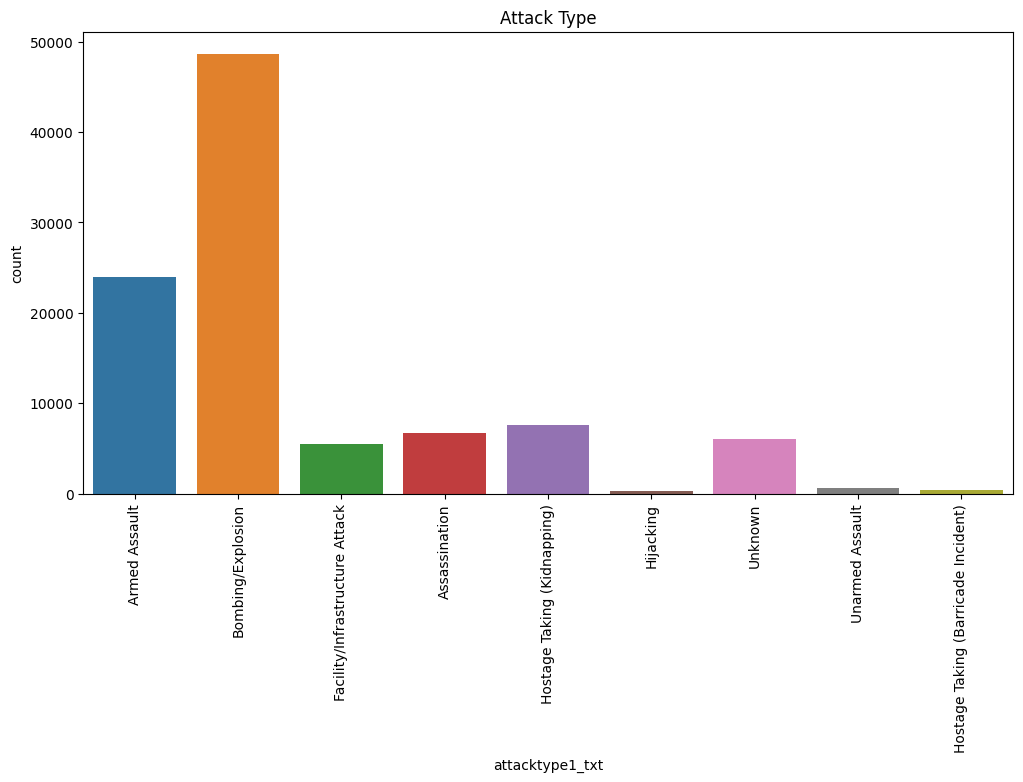

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6));
sns.countplot(merged_big_df, x='attacktype1_txt');
plt.xticks(rotation=90)
plt.title('Attack Type')
plt.show()

In [ ]:
merged_big_df['attacktype1_txt'].unique()

array(['Armed Assault', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Assassination',
       'Hostage Taking (Kidnapping)', 'Hijacking', 'Unknown',
       'Unarmed Assault', 'Hostage Taking (Barricade Incident)'],
      dtype=object)

In [ ]:
merged_big_df['attacktype1_txt'] = merged_big_df['attacktype1_txt'].replace({
    'Hostage Taking (Kidnapping)': 'Hostage Taking',
    'Hostage Taking (Barricade Incident)': 'Hostage Taking'
})

In [ ]:
attacl_df = merged_big_df

In [ ]:
attacl_df = attacl_df[attacl_df.attacktype1_txt != 'Unknown']

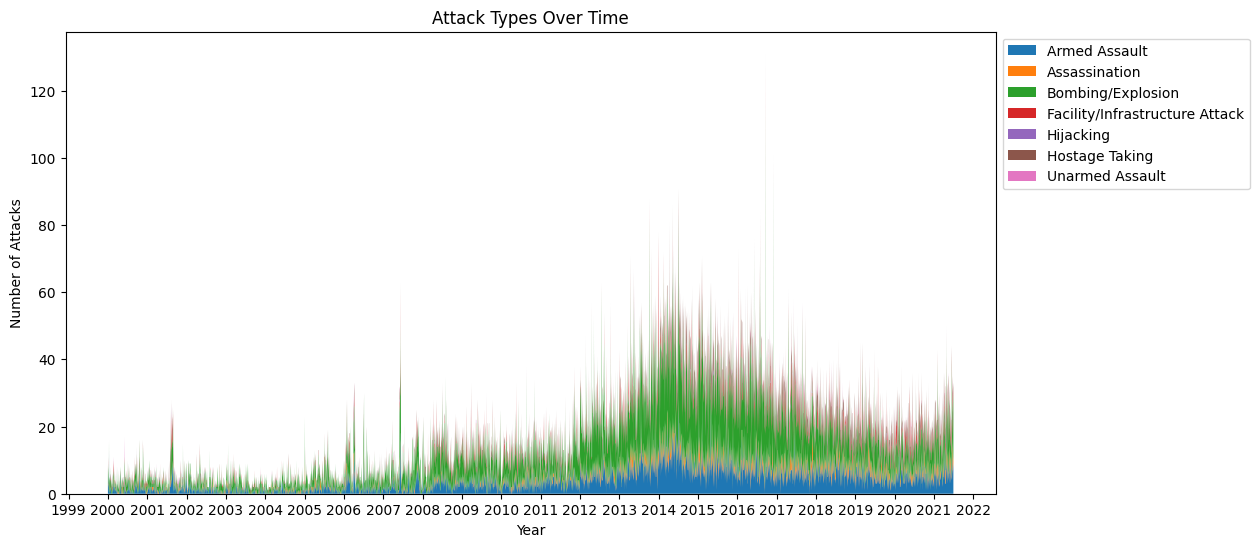

In [ ]:
stackplot_df = pd.pivot_table(attacl_df, index='date', columns='attacktype1_txt', aggfunc='size', fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))

ax.stackplot(stackplot_df.index, stackplot_df.values.T, labels=stackplot_df.columns)

plt.title('Attack Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.show()

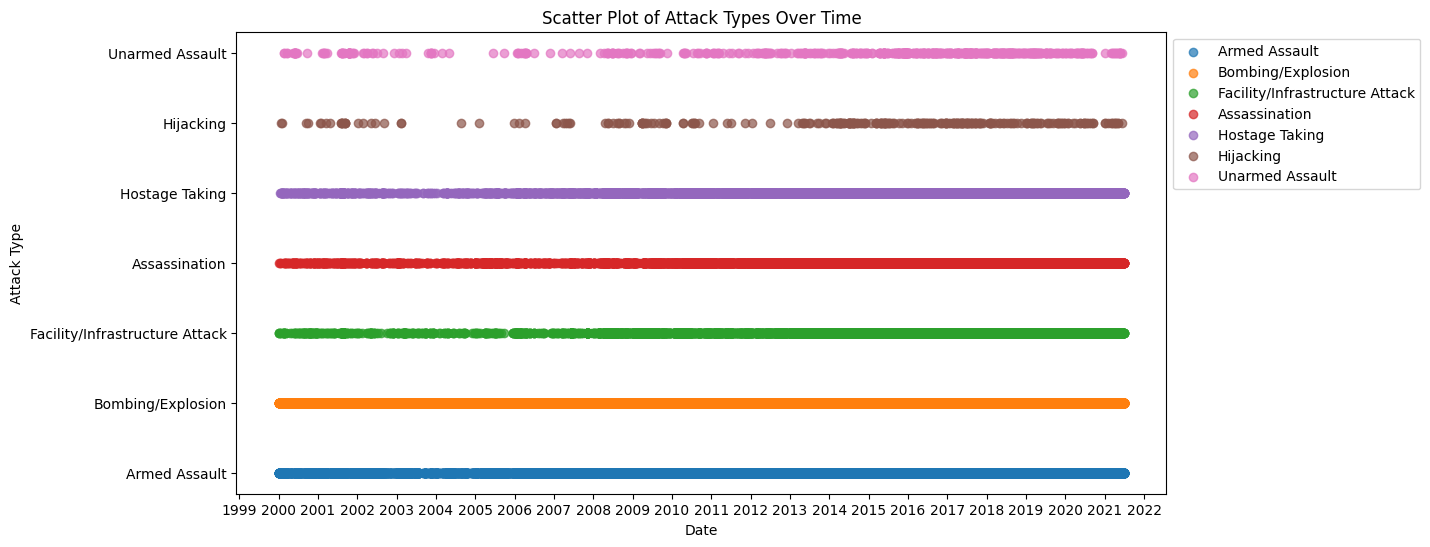

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette(n_colors=len(attacl_df['attacktype1_txt'].unique()))

for i, (attack_type, color) in enumerate(zip(attacl_df['attacktype1_txt'].unique(), colors)):
    subset = attacl_df[attacl_df['attacktype1_txt'] == attack_type]
    ax.scatter(subset['date'], [i] * len(subset), label=attack_type, color=color, alpha=0.7)

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.title('Scatter Plot of Attack Types Over Time')
plt.xlabel('Date')
plt.yticks(range(len(attacl_df['attacktype1_txt'].unique())), attacl_df['attacktype1_txt'].unique())
plt.ylabel('Attack Type')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

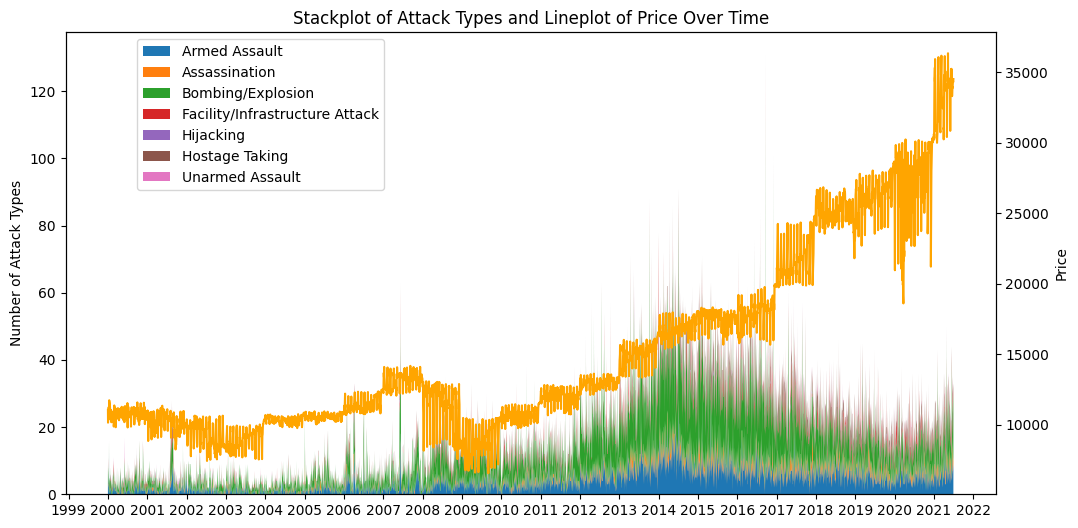

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.stackplot(stackplot_df.index, stackplot_df.values.T, labels=stackplot_df.columns)

ax2 = ax1.twinx()

sns.lineplot(data=attacl_df, x='date', y='Price', ax=ax2, color='orange')
ax2.set_ylabel('Price')

ax1.set_ylabel('Number of Attack Types')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(0.35, 1))

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)

plt.title('Stackplot of Attack Types and Lineplot of Price Over Time')

plt.show()

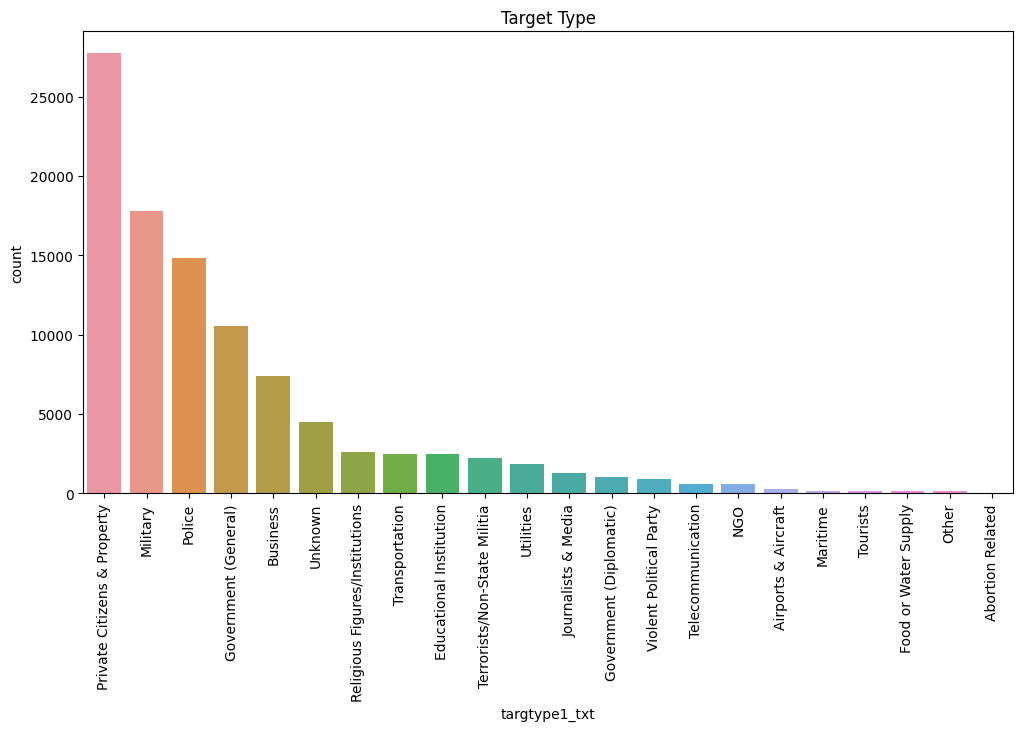

In [ ]:
target_type_counts = merged_big_df['targtype1_txt'].value_counts()

ordered_target_types = target_type_counts.index

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(merged_big_df, x='targtype1_txt', order=ordered_target_types)
plt.xticks(rotation=90)
plt.title('Target Type')
plt.show()

In [ ]:
merged_big_df['targtype1_txt'].unique()

array(['Government (General)', 'Private Citizens & Property', 'Utilities',
       'Abortion Related', 'Business', 'Military',
       'Religious Figures/Institutions', 'Government (Diplomatic)',
       'Tourists', 'Transportation', 'Violent Political Party',
       'Telecommunication', 'NGO', 'Police', 'Journalists & Media',
       'Terrorists/Non-State Militia', 'Educational Institution',
       'Airports & Aircraft', 'Maritime', 'Unknown',
       'Food or Water Supply', 'Other'], dtype=object)

In [ ]:
merged_big_df['targtype1_txt'].nunique()

22

In [ ]:
merged_big_df['targtype1_txt'] = merged_big_df['targtype1_txt'].replace({
    'Government (General)': 'Government',
    'Government (Diplomatic)': 'Government'
})

In [ ]:
target_df = merged_big_df

In [ ]:
target_df = target_df[
    (target_df['targtype1_txt'] == 'Private Citizens & Property') |
    (target_df['targtype1_txt'] == 'Military') |
    (target_df['targtype1_txt'] == 'Police') |
    (target_df['targtype1_txt'] == 'Government') |
    (target_df['targtype1_txt'] == 'Business')
]

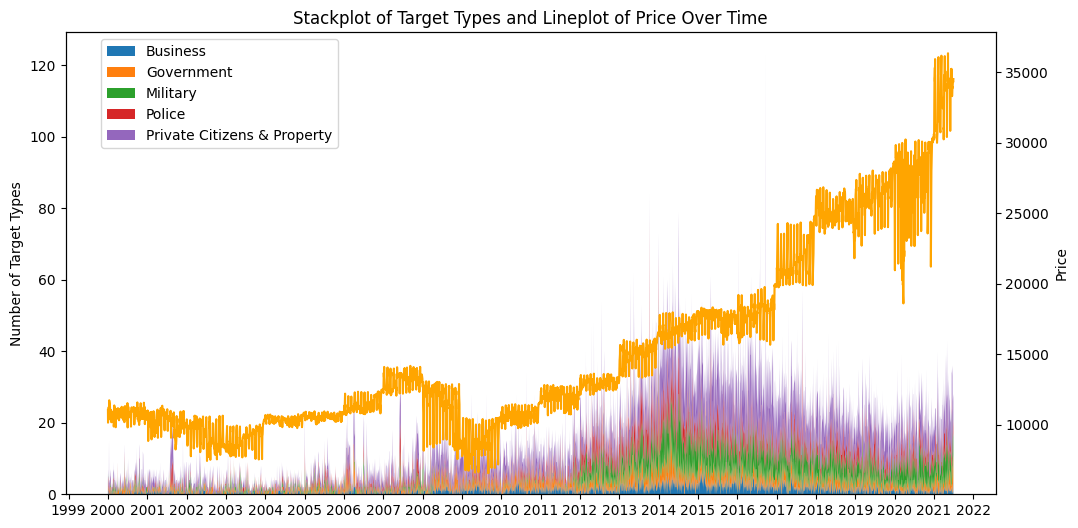

In [ ]:
stackplot_df2 = pd.pivot_table(target_df, index='date', columns='targtype1_txt', aggfunc='size', fill_value=0)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.stackplot(stackplot_df2.index, stackplot_df2.values.T, labels=stackplot_df2.columns)

ax2 = ax1.twinx()

sns.lineplot(data=target_df, x='date', y='Price', ax=ax2, color='orange')
ax2.set_ylabel('Price')

ax1.set_ylabel('Number of Target Types')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(0.3, 1))

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)

plt.title('Stackplot of Target Types and Lineplot of Price Over Time')

plt.show()


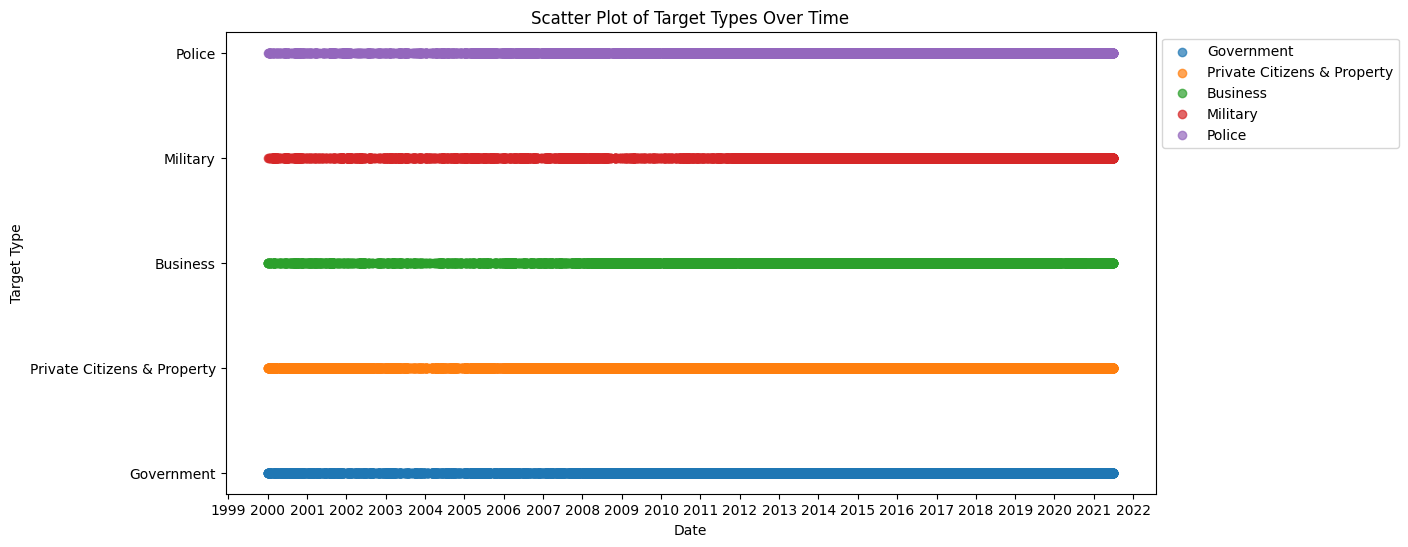

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette(n_colors=len(target_df['targtype1_txt'].unique()))

for i, (target_type, color) in enumerate(zip(target_df['targtype1_txt'].unique(), colors)):
    subset = target_df[target_df['targtype1_txt'] == target_type]
    ax.scatter(subset['date'], [i] * len(subset), label=target_type, color=color, alpha=0.7)

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.title('Scatter Plot of Target Types Over Time')
plt.xlabel('Date')
plt.yticks(range(len(target_df['targtype1_txt'].unique())), target_df['targtype1_txt'].unique())
plt.ylabel('Target Type')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

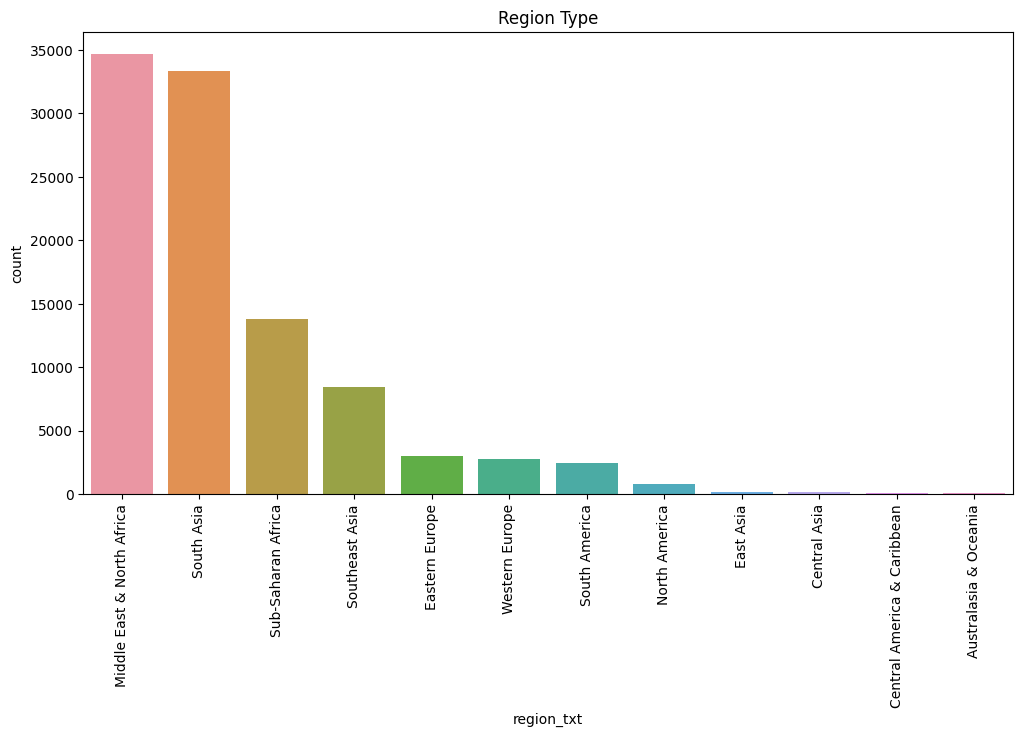

In [ ]:
region_type_counts = merged_big_df['region_txt'].value_counts()

ordered_region_types = region_type_counts.index

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(merged_big_df, x='region_txt', order=ordered_region_types)
plt.xticks(rotation=90)
plt.title('Region Type')
plt.show()

In [ ]:
region_df = merged_big_df

In [ ]:
region_df['region_txt'].unique()

array(['Western Europe', 'Middle East & North Africa', 'South America',
       'North America', 'South Asia', 'Sub-Saharan Africa',
       'Eastern Europe', 'Southeast Asia', 'Central Asia', 'East Asia',
       'Central America & Caribbean', 'Australasia & Oceania'],
      dtype=object)

In [ ]:
region_df['region_txt'].nunique()

12

In [ ]:
region_df = region_df[
    (region_df['region_txt'] != 'East Asia') &
    (region_df['region_txt'] != 'Central Asia') &
    (region_df['region_txt'] != 'Central America & Caribbean') &
    (region_df['region_txt'] != 'Australasia & Oceania')]

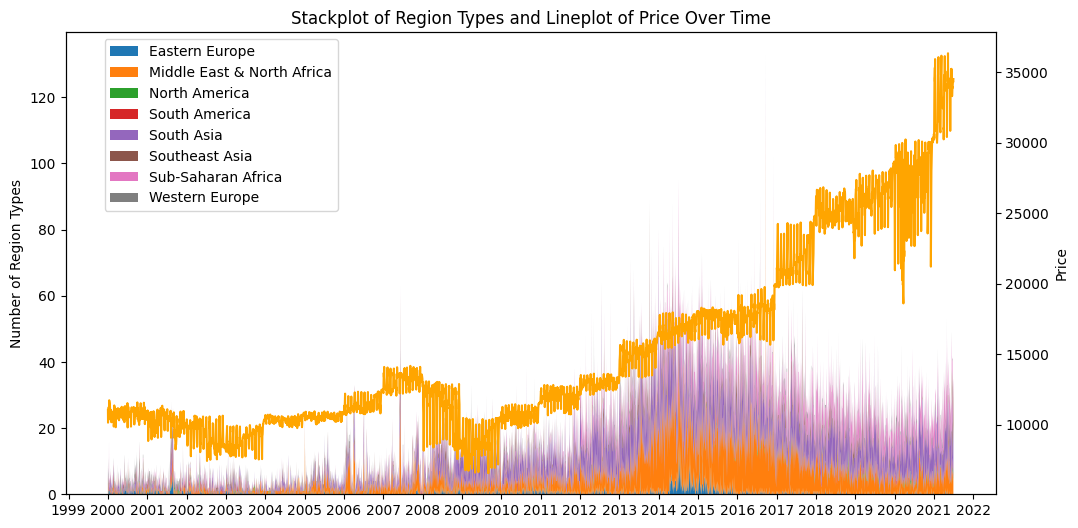

In [ ]:
stackplot_df3 = pd.pivot_table(region_df, index='date', columns='region_txt', aggfunc='size', fill_value=0)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.stackplot(stackplot_df3.index, stackplot_df3.values.T, labels=stackplot_df3.columns)

ax2 = ax1.twinx()

sns.lineplot(data=target_df, x='date', y='Price', ax=ax2, color='orange')
ax2.set_ylabel('Price')

ax1.set_ylabel('Number of Region Types')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(0.3, 1))

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)

plt.title('Stackplot of Region Types and Lineplot of Price Over Time')

plt.show()

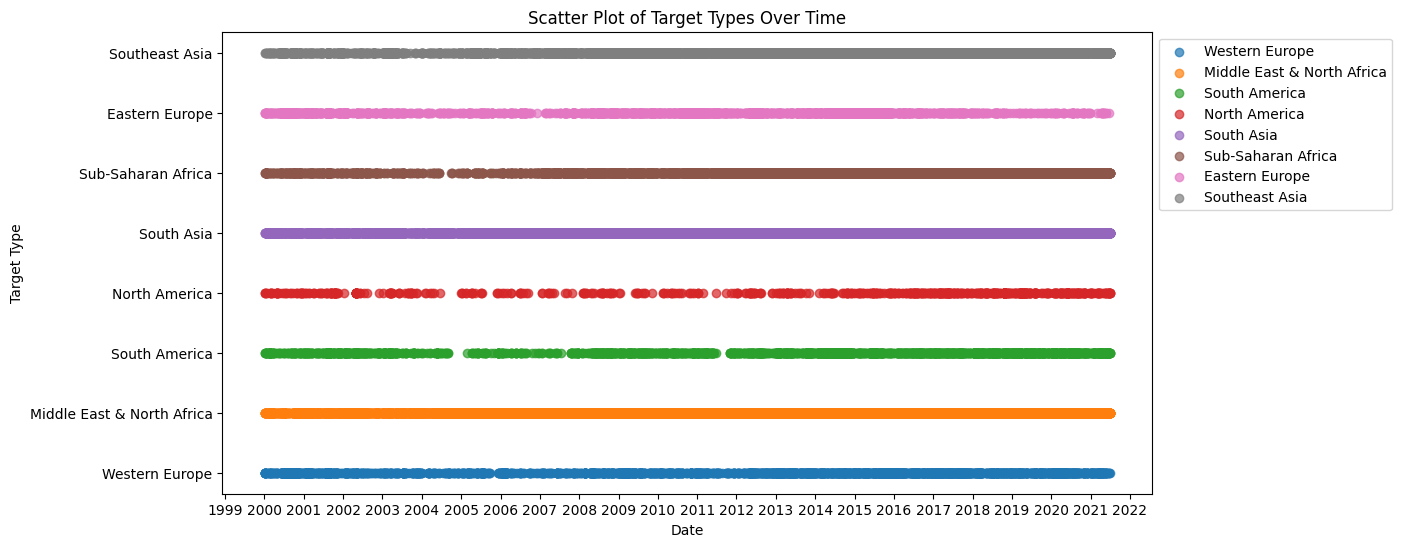

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette(n_colors=len(region_df['region_txt'].unique()))

for i, (region_type, color) in enumerate(zip(region_df['region_txt'].unique(), colors)):
    subset = region_df[region_df['region_txt'] == region_type]
    ax.scatter(subset['date'], [i] * len(subset), label=region_type, color=color, alpha=0.7)

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

plt.title('Scatter Plot of Target Types Over Time')
plt.xlabel('Date')
plt.yticks(range(len(region_df['region_txt'].unique())), region_df['region_txt'].unique())
plt.ylabel('Target Type')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

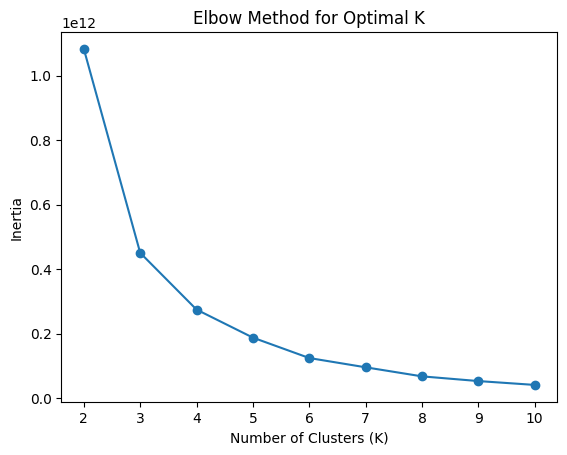

In [ ]:
from sklearn.cluster import KMeans

features = merged_big_df[['longitude', 'latitude', 'nkill', 'nwound', 'Price']]

k_values = range(2, 11)

inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o');
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

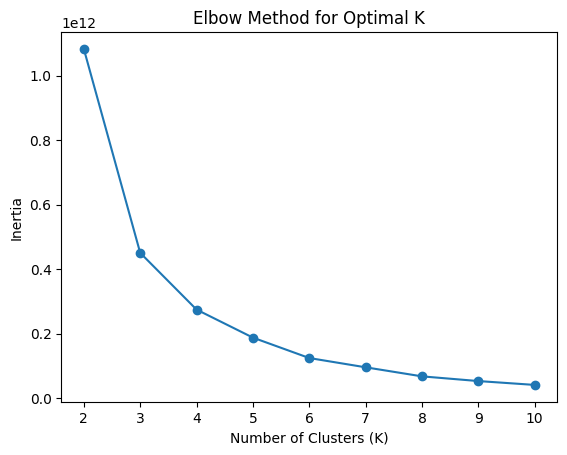

In [ ]:
features = merged_big_df[['nkill', 'nwound', 'Price', 'year']]

k_values = range(2, 11)

inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o');
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

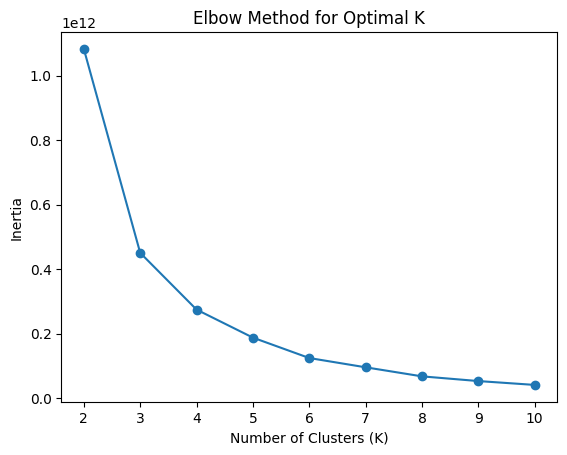

In [ ]:
features = merged_big_df[['longitude', 'latitude', 'region', 'nkill', 'nwound', 'Price']]

k_values = range(2, 11)

inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o');
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

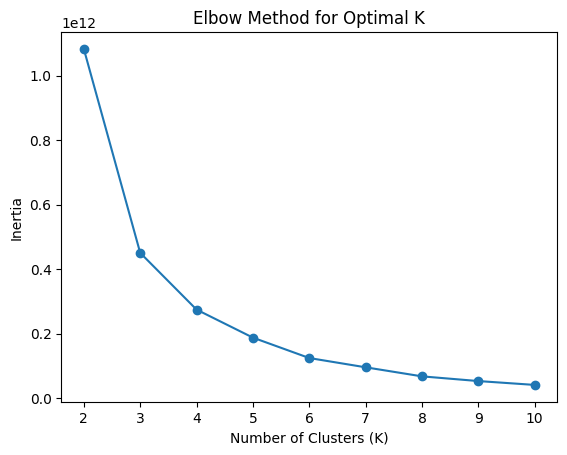

In [ ]:
features = merged_big_df[['longitude', 'latitude', 'region', 'nkill', 'nwound', 'Price', 'year']]

k_values = range(2, 11)

inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o');
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


import folium
from matplotlib.colors import ListedColormap

features = merged_big_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price']]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_big_df['Cluster'] = kmeans.fit_predict(features)

colors = ListedColormap(['blue', 'red', 'green'])

m = folium.Map(location=[merged_big_df['latitude'].mean(), merged_big_df['longitude'].mean()], zoom_start=2)

for index, row in merged_big_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=colors(row['Cluster']),
        fill=True,
        fill_color=colors(row['Cluster']),
        fill_opacity=0.6,
        tooltip=f"Cluster: {row['Cluster']}<br>DJIA Price: {row['Price']}"
    ).add_to(m)

m.save("cluster_map.html")

m.save("cluster_map.html")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


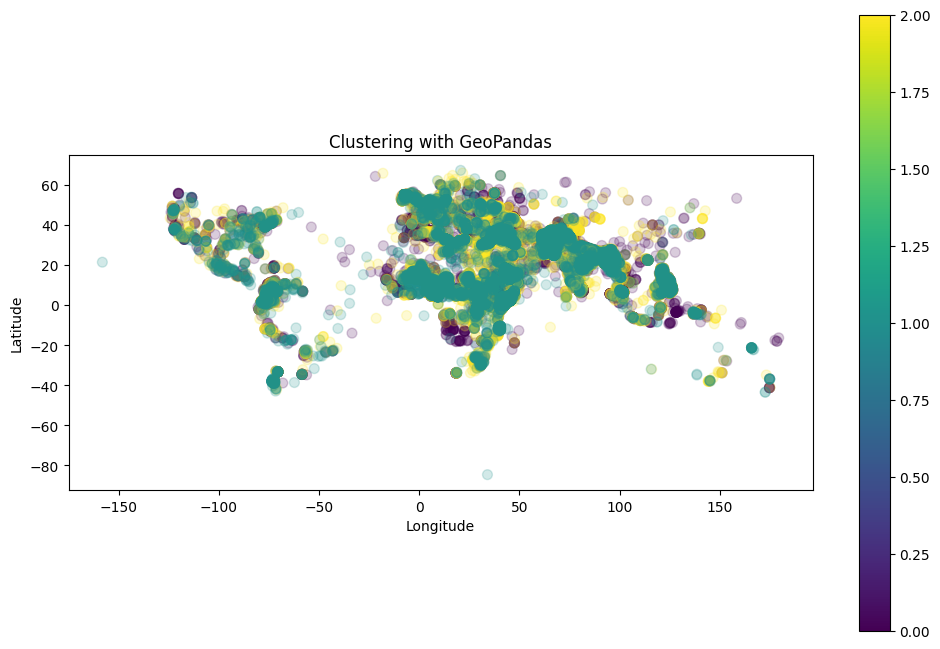

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

features = merged_big_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price']]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_big_df['Cluster'] = kmeans.fit_predict(features)

geometry = [Point(xy) for xy in zip(merged_big_df['longitude'], merged_big_df['latitude'])]
gdf = gpd.GeoDataFrame(merged_big_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column='Cluster', legend=True, cmap='viridis', markersize=50, alpha=0.2)

plt.title('Clustering with GeoPandas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

features = merged_big_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price']]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_big_df['Cluster'] = kmeans.fit_predict(features)

fig = px.scatter_mapbox(
    merged_big_df,
    lat='latitude',
    lon='longitude',
    color='Cluster',
    size='Price',
    opacity=0.2,
    mapbox_style="carto-positron",
    title='Clustering with Longitude, Latitude, and DJIA Prices',
    labels={'Price': 'DJIA Price'},
)

fig.update_layout(mapbox=dict(center=dict(lat=0, lon=0), zoom=1))
fig.show()


features = merged_big_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price']]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_big_df['Cluster'] = kmeans.fit_predict(features)

fig = px.scatter_mapbox(
    merged_big_df,
    lat='latitude',
    lon='longitude',
    color='Cluster',
    size='Price',
    opacity=0.2,
    mapbox_style="carto-positron",
    title='Clustering with Longitude, Latitude, and DJIA Prices',
    labels={'Price': 'DJIA Price'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(mapbox=dict(center=dict(lat=0, lon=0), zoom=1))
fig.show()

In [ ]:
features = merged_big_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price']]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_big_df['Cluster'] = kmeans.fit_predict(features)

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)

print("Cluster Centers:")
print(cluster_centers)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
    latitude  longitude     nkill    nwound         Price
0  26.652181  51.908492  2.385150  4.914731  11342.054483
1  22.943189  47.437992  2.437865  1.933109  26933.689233
2  26.200780  50.936542  2.457896  2.765412  17535.368370


In [ ]:
features = merged_big_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price', 'year', 'region']]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_big_df['Cluster'] = kmeans.fit_predict(features)

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)

print("Cluster Centers:")
print(cluster_centers)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
    latitude  longitude     nkill    nwound         Price         year  \
0  26.652181  51.908492  2.385150  4.914731  11342.054483  2008.276883   
1  22.943189  47.437992  2.437865  1.933109  26933.689233  2019.057378   
2  26.200780  50.936542  2.457896  2.765412  17535.368370  2014.926273   

     region  
0  7.656331  
1  7.986903  
2  8.314431  


In [ ]:
cluster_df = merged_big_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price', 'year', 'region']]

In [ ]:
cluster_df

latitude  longitude  nkill  nwound     Price  year  region
0      50.973734  11.022435      0       0  11041.06  2000       8
1      36.264580   3.030830      5       0  11041.06  2000      10
2       4.667128 -74.106056      0       0  11041.06  2000       3
3       7.198606 -75.341218      0       0  11041.06  2000       3
4      39.103175 -84.511981      0       0  10137.93  2000       1
...          ...        ...    ...     ...       ...   ...     ...
99781  12.867140  44.983957      1       0  34502.51  2021      10
99782  34.674867  70.213444      1       0  34502.51  2021       6
99783  37.214978  67.414769      0       0  34502.51  2021       6
99784  16.912033   0.299578      2       0  34502.51  2021      11
99785  23.974583  97.895734      0       0  34502.51  2021       5

[99786 rows x 7 columns]

In [ ]:
cluster_df.to_csv('cluster_df.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'merged_big_df' is your DataFrame and 'features' is the subset of features to be normalized
features = cluster_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price', 'year', 'region']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
features_normalized = scaler.fit_transform(features)

# Create a DataFrame with the normalized features
features_normalized_df = pd.DataFrame(features_normalized, columns=features.columns)

# Replace the original features in 'merged_big_df' with the normalized features
cluster_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price', 'year', 'region']] = features_normalized_df

<ipython-input-137-fe77d9311c04>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price', 'year', 'region']] = features_normalized_df


In [ ]:
features = cluster_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price', 'year', 'region']]

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_big_df['Cluster'] = kmeans.fit_predict(features)

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)

print("Cluster Centers:")
print(cluster_centers)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
   latitude  longitude       nkill      nwound     Price      year    region
0  0.100251   0.258370   -0.039167    0.006764 -0.757907 -0.742100 -0.356862
1 -0.092339  -0.237742    0.031274   -0.014537  0.697826  0.683326  0.328660
2  1.090534  -3.348635  124.297190  215.862192 -1.344240 -2.746055 -2.911597


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-139-21db38058471>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cluster'] = kmeans.fit_predict(features_normalized)


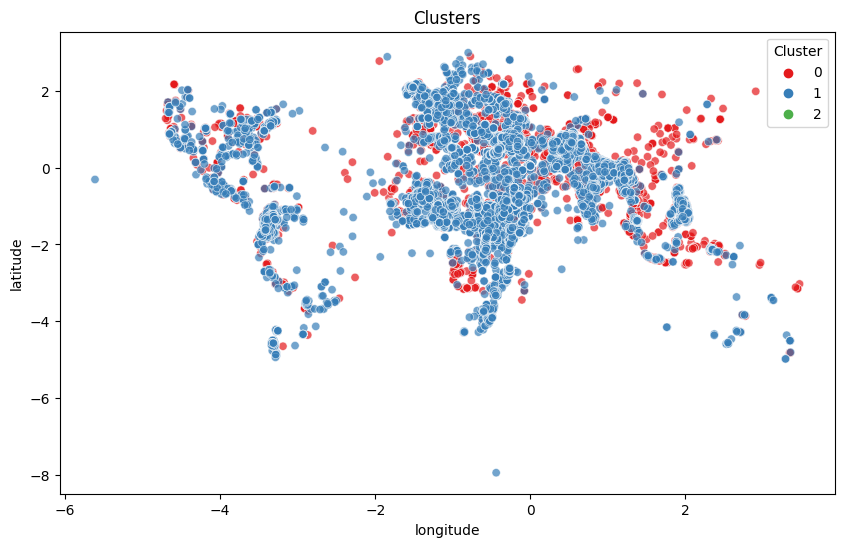

In [ ]:
features = cluster_df[['latitude', 'longitude', 'nkill', 'nwound', 'Price', 'year', 'region']]

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(features_normalized)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=cluster_df, palette='Set1', legend='full', alpha=0.7)
plt.title('Clusters')
plt.show()

In [ ]:
correlation = merged_df['Price'].corr(merged_df['country'])
print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: 0.5105757722575712


In [ ]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(merged_df['Price'], merged_df['country'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.5105757722575712
P-value: 0.0


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(merged_df['Price'])
y = merged_df['country']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                country   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1867.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        04:19:40   Log-Likelihood:                -21133.
No. Observations:                5297   AIC:                         4.227e+04
Df Residuals:                    5295   BIC:                         4.228e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3798      0.463      0.819      0.4

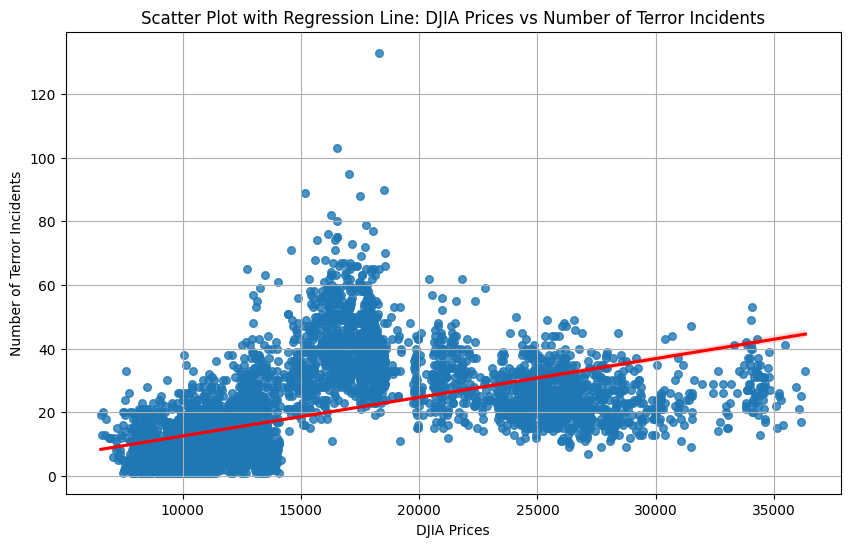

Pearson Correlation Coefficient: 0.5105757722575712
P-value: 0.0


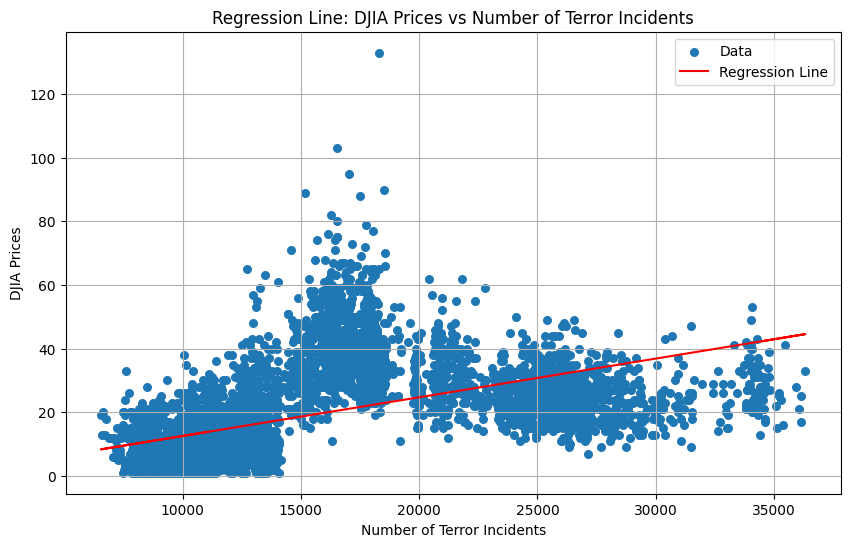

                            OLS Regression Results                            
Dep. Variable:                country   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1867.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        04:24:01   Log-Likelihood:                -21133.
No. Observations:                5297   AIC:                         4.227e+04
Df Residuals:                    5295   BIC:                         4.228e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3798      0.463      0.819      0.4

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='country', data=merged_df, scatter_kws={'s': 30}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: DJIA Prices vs Number of Terror Incidents')
plt.xlabel('DJIA Prices')
plt.ylabel('Number of Terror Incidents')
plt.grid(True)
plt.show()

# Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(merged_df['Price'], merged_df['country'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Regression analysis and summary
X = sm.add_constant(merged_df['Price'])
y = merged_df['country']
model = sm.OLS(y, X).fit()

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Price'], merged_df['country'], label='Data', s=30)
plt.plot(merged_df['Price'], model.predict(X), color='red', label='Regression Line')
plt.title('Regression Line: DJIA Prices vs Number of Terror Incidents')
plt.xlabel('Number of Terror Incidents')
plt.ylabel('DJIA Prices')
plt.legend()
plt.grid(True)
plt.show()

print(model.summary())